<a href="https://colab.research.google.com/github/shizacharania/Brain-Tumour-Classification/blob/main/IMALAB_BraTS_Challenge_MulticlassMasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Training/Validation/Testing
│
└─── 00000
│   │
│   └─── FLAIR
│   │   │ Image.nii.gz
│   │   
│   └─── T1
│   │   │ Image.nii.gz
│   │   
│   └─── T1CE
│   │   │ Image.nii.gz
│   │   
│   └─── T2
│   │   │ Image.nii.gz
|   |   
|   |___ Segmentation
|   |   | Image.nii.gz
│   
└─── 00001
│
│ ... 
│ ...   
│   
└─── 00002
"""

"""
- extracting (called "open" on the file viewer) all the files with ".nii.gz" (basically getting all the files)
- view an image - look into: can you have multiple windows for MRIcro
- also look at the viewer thing in colab

then i can do preprocessing
"""

'\n- extracting (called "open" on the file viewer) all the files with ".nii.gz" (basically getting all the files)\n- view an image - look into: can you have multiple windows for MRIcro\n- also look at the viewer thing in colab\n\nthen i can do preprocessing\n'

In [2]:
!gdown --id 17_VDkS9f0QA8IIGqdWFgm6d2JASBtILt

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17_VDkS9f0QA8IIGqdWFgm6d2JASBtILt
To: /content/brats_120_images.zip
100% 235M/235M [00:01<00:00, 150MB/s]


In [3]:
!unzip /content/brats_120_images.zip

Archive:  /content/brats_120_images.zip
replace brats_120_images/BraTS2021_00025_seg.nii? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [4]:
import glob
"""
glob.glob
you can have a function for retrieving the file paths by having a variable for each of the volumes + segmented
e.x. for a segmentation file:
"/Users/shizacharania/Desktop/brats_data/RSNA_ASNR_MICCAI_BraTS2021_TrainingData_16July2021/BraTS2021_00000_seg.nii"
then you would look for the "BraTS2021_" in the beginning and the "*/*" stuff and then the "_seg.nii" (the extracted nifti files dont have ".gz")
"""

flair_paths = glob.glob("*/*_flair.nii")
flair_paths = sorted(flair_paths)
print(flair_paths)
print(len(flair_paths))

t1_paths = glob.glob("*/*_t1.nii")
t1_paths = sorted(t1_paths)
print(t1_paths)
print(len(t1_paths))

t1ce_paths = glob.glob("*/*_t1ce.nii")
t1ce_paths = sorted(t1ce_paths)
print(t1ce_paths)
print(len(t1ce_paths))

t2_paths = glob.glob("*/*_t2.nii")
t2_paths = sorted(t2_paths)
print(t2_paths)
print(len(t2_paths))

seg_paths = glob.glob("*/*_seg.nii")
seg_paths = sorted(seg_paths)
print(seg_paths)
print(len(seg_paths))

all = glob.glob("*/*.nii")
print(24*5==len(all))

['brats_120_images/BraTS2021_00000_flair.nii', 'brats_120_images/BraTS2021_00002_flair.nii', 'brats_120_images/BraTS2021_00003_flair.nii', 'brats_120_images/BraTS2021_00005_flair.nii', 'brats_120_images/BraTS2021_00006_flair.nii', 'brats_120_images/BraTS2021_00008_flair.nii', 'brats_120_images/BraTS2021_00009_flair.nii', 'brats_120_images/BraTS2021_00011_flair.nii', 'brats_120_images/BraTS2021_00012_flair.nii', 'brats_120_images/BraTS2021_00014_flair.nii', 'brats_120_images/BraTS2021_00016_flair.nii', 'brats_120_images/BraTS2021_00017_flair.nii', 'brats_120_images/BraTS2021_00018_flair.nii', 'brats_120_images/BraTS2021_00019_flair.nii', 'brats_120_images/BraTS2021_00020_flair.nii', 'brats_120_images/BraTS2021_00021_flair.nii', 'brats_120_images/BraTS2021_00022_flair.nii', 'brats_120_images/BraTS2021_00024_flair.nii', 'brats_120_images/BraTS2021_00025_flair.nii', 'brats_120_images/BraTS2021_00026_flair.nii', 'brats_120_images/BraTS2021_00028_flair.nii', 'brats_120_images/BraTS2021_00030

In [5]:
# /content/brats_data_992/BraTS2021_00275_flair.nii
for i in range(len(flair_paths)):
  flair_paths[i] = "/content/" + flair_paths[i]

for i in range(len(t1_paths)):
  t1_paths[i] = "/content/" + t1_paths[i]

for i in range(len(t1ce_paths)):
  t1ce_paths[i] = "/content/" + t1ce_paths[i]

for i in range(len(t2_paths)):
  t2_paths[i] = "/content/" + t2_paths[i]

for i in range(len(seg_paths)):
  seg_paths[i] = "/content/" + seg_paths[i]

print(flair_paths[0])
print(t1_paths[0])
print(t1ce_paths[0])
print(t2_paths[0])
print(seg_paths[0])

/content/brats_120_images/BraTS2021_00000_flair.nii
/content/brats_120_images/BraTS2021_00000_t1.nii
/content/brats_120_images/BraTS2021_00000_t1ce.nii
/content/brats_120_images/BraTS2021_00000_t2.nii
/content/brats_120_images/BraTS2021_00000_seg.nii


In [6]:
"""
my approach to visualize 3d images:
- use simpleitk (sitk)
   - i need to load the images into sitk format and then convert it into a numpy array

- from a numpy array, i need to do 2 tasks
    1. i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that
    2. i will visualize the 3d image entirely and have a scrolling feature that goes through these 2d array slices

look into basics of simpleitk - how to read the file and then convert it into np.array()
look into "Exploring 3D images with Matplotlib" - https://www.youtube.com/watch?v=5jQVQE6yfio
look into what fatemeh did: https://youtu.be/rBIetBho0x4
"""

'\nmy approach to visualize 3d images:\n- use simpleitk (sitk)\n   - i need to load the images into sitk format and then convert it into a numpy array\n\n- from a numpy array, i need to do 2 tasks\n    1. i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that\n    2. i will visualize the 3d image entirely and have a scrolling feature that goes through these 2d array slices\n\nlook into basics of simpleitk - how to read the file and then convert it into np.array()\nlook into "Exploring 3D images with Matplotlib" - https://www.youtube.com/watch?v=5jQVQE6yfio\nlook into what fatemeh did: https://youtu.be/rBIetBho0x4\n'

In [7]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import SimpleITK as sitk

In [9]:
# reading a file in simpleitk (sitk)

flair_nparrays = []
t1_nparrays = []
t1ce_nparrays = []
t2_nparrays = []
seg_nparrays = []

for flair_imagepath in flair_paths:
  img = sitk.ReadImage(flair_imagepath)
  img = sitk.GetArrayFromImage(img)
  flair_nparrays.append(img)

for t1_imagepath in t1_paths:
  img = sitk.ReadImage(t1_imagepath)
  img = sitk.GetArrayFromImage(img)
  t1_nparrays.append(img)

for t1ce_imagepath in t1ce_paths:
  img = sitk.ReadImage(t1ce_imagepath)
  img = sitk.GetArrayFromImage(img)
  t1ce_nparrays.append(img)

for t2_imagepath in t2_paths:
  img = sitk.ReadImage(t2_imagepath)
  img = sitk.GetArrayFromImage(img)
  t2_nparrays.append(img)

for seg_imagepath in seg_paths:
  img = sitk.ReadImage(seg_imagepath)
  img = sitk.GetArrayFromImage(img)
  seg_nparrays.append(img)

In [10]:
print(len(flair_nparrays))
print(len(t1_nparrays))
print(len(t1ce_nparrays))
print(len(t2_nparrays))
print(len(seg_nparrays))

24
24
24
24
24


In [11]:
# i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that

import matplotlib.pyplot as plt
import numpy

In [12]:
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

# I'll do this part by myself after

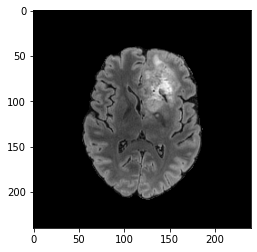

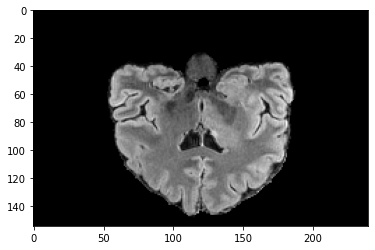

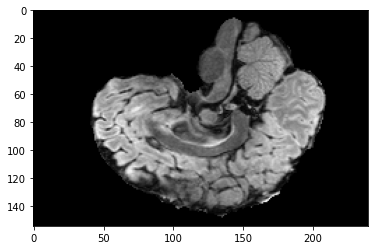

In [13]:
# axial
brain_slice = flair_nparrays[0][77, :, :] # changing Z from [Z,X,Y], which is [155,240,240]
plt.imshow(brain_slice, cmap="gray")
plt.show()

# sagittal
brain_slice = flair_nparrays[0][:, 120, :] # changing X from [Z,X,Y], which is [155,240,240]
plt.imshow(brain_slice, cmap="gray")
plt.show()

# coronal
brain_slice = flair_nparrays[0][:, :, 120] # changing Y from [Z,X,Y], which is [155,240,240]
plt.imshow(brain_slice, cmap="gray")
plt.show()

In [14]:
# testing_img = flair_nparrays[9]
# print(testing_img.shape)
# print(type(testing_img))

# # print(testing_img[:, :, :])

# for i in range(testing_img.shape[0]):
#   brain_slice = testing_img[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
#   plt.imshow(brain_slice, cmap="gray")
#   plt.show()
#   plt.close()

Flair Example:
/content/brats_120_images/BraTS2021_00000_flair.nii
/content/brats_120_images/BraTS2021_00002_flair.nii
/content/brats_120_images/BraTS2021_00003_flair.nii
/content/brats_120_images/BraTS2021_00005_flair.nii
/content/brats_120_images/BraTS2021_00006_flair.nii
/content/brats_120_images/BraTS2021_00008_flair.nii
/content/brats_120_images/BraTS2021_00009_flair.nii
/content/brats_120_images/BraTS2021_00011_flair.nii
/content/brats_120_images/BraTS2021_00012_flair.nii
/content/brats_120_images/BraTS2021_00014_flair.nii


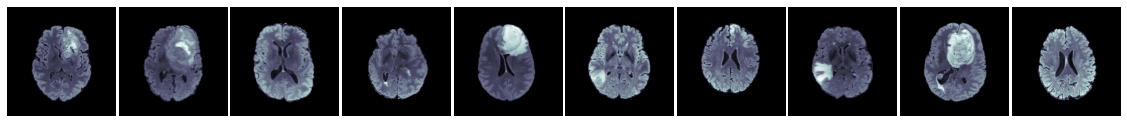

In [15]:
slice_num = 77 # 155/2 = approx. 77
nrows = 10
ncols = 10

plt.figure(figsize=(20,20))

print("Flair Example:")
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(flair_paths[i])
  ex_img_flair = flair_nparrays[i]
  plt.imshow(ex_img_flair[slice_num, :, :], cmap="bone")
plt.show()

T1 Example:
/content/brats_120_images/BraTS2021_00000_t1.nii
/content/brats_120_images/BraTS2021_00002_t1.nii
/content/brats_120_images/BraTS2021_00003_t1.nii
/content/brats_120_images/BraTS2021_00005_t1.nii
/content/brats_120_images/BraTS2021_00006_t1.nii
/content/brats_120_images/BraTS2021_00008_t1.nii
/content/brats_120_images/BraTS2021_00009_t1.nii
/content/brats_120_images/BraTS2021_00011_t1.nii
/content/brats_120_images/BraTS2021_00012_t1.nii
/content/brats_120_images/BraTS2021_00014_t1.nii


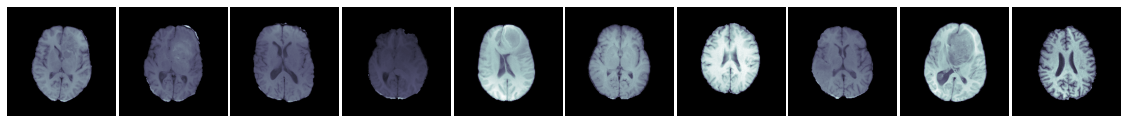

In [16]:
plt.figure(figsize=(20,20))

print("T1 Example:")
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(t1_paths[i])
  ex_img_t1 = t1_nparrays[i]
  plt.imshow(ex_img_t1[slice_num, :, :], cmap="bone")
plt.show()

T1CE Example:
/content/brats_120_images/BraTS2021_00000_t1ce.nii
/content/brats_120_images/BraTS2021_00002_t1ce.nii
/content/brats_120_images/BraTS2021_00003_t1ce.nii
/content/brats_120_images/BraTS2021_00005_t1ce.nii
/content/brats_120_images/BraTS2021_00006_t1ce.nii
/content/brats_120_images/BraTS2021_00008_t1ce.nii
/content/brats_120_images/BraTS2021_00009_t1ce.nii
/content/brats_120_images/BraTS2021_00011_t1ce.nii
/content/brats_120_images/BraTS2021_00012_t1ce.nii
/content/brats_120_images/BraTS2021_00014_t1ce.nii


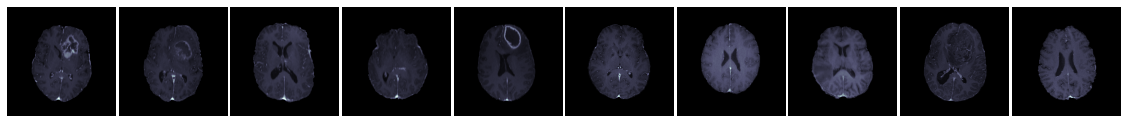

In [17]:
plt.figure(figsize=(20,20))

print("T1CE Example:")
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(t1ce_paths[i])
  ex_img_t1ce = t1ce_nparrays[i]
  plt.imshow(ex_img_t1ce[slice_num, :, :], cmap="bone")
plt.show()

T2 Example:
/content/brats_120_images/BraTS2021_00000_t2.nii
/content/brats_120_images/BraTS2021_00002_t2.nii
/content/brats_120_images/BraTS2021_00003_t2.nii
/content/brats_120_images/BraTS2021_00005_t2.nii
/content/brats_120_images/BraTS2021_00006_t2.nii
/content/brats_120_images/BraTS2021_00008_t2.nii
/content/brats_120_images/BraTS2021_00009_t2.nii
/content/brats_120_images/BraTS2021_00011_t2.nii
/content/brats_120_images/BraTS2021_00012_t2.nii
/content/brats_120_images/BraTS2021_00014_t2.nii


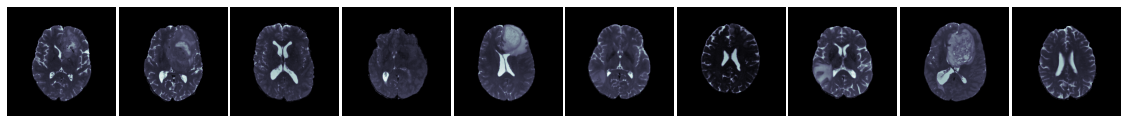

In [18]:
plt.figure(figsize=(20,20))

print("T2 Example:")
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(t2_paths[i])
  ex_img_t2 = t2_nparrays[i]
  plt.imshow(ex_img_t2[slice_num, :, :], cmap="bone")
plt.show()

Segmentations Example:
/content/brats_120_images/BraTS2021_00000_seg.nii
/content/brats_120_images/BraTS2021_00002_seg.nii
/content/brats_120_images/BraTS2021_00003_seg.nii
/content/brats_120_images/BraTS2021_00005_seg.nii
/content/brats_120_images/BraTS2021_00006_seg.nii
/content/brats_120_images/BraTS2021_00008_seg.nii
/content/brats_120_images/BraTS2021_00009_seg.nii
/content/brats_120_images/BraTS2021_00011_seg.nii
/content/brats_120_images/BraTS2021_00012_seg.nii
/content/brats_120_images/BraTS2021_00014_seg.nii


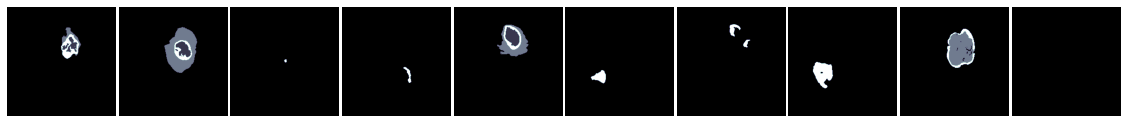

In [19]:
plt.figure(figsize=(20,20))

print("Segmentations Example:")
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(seg_paths[i])
  ex_img_seg = seg_nparrays[i]
  plt.imshow(ex_img_seg[slice_num,:, :], cmap="bone")
plt.show()

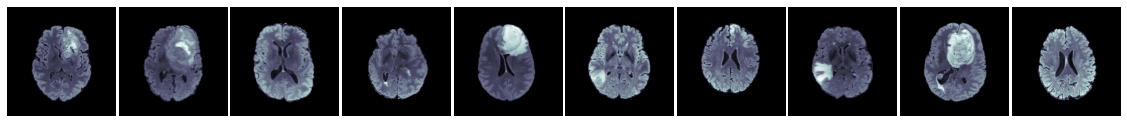

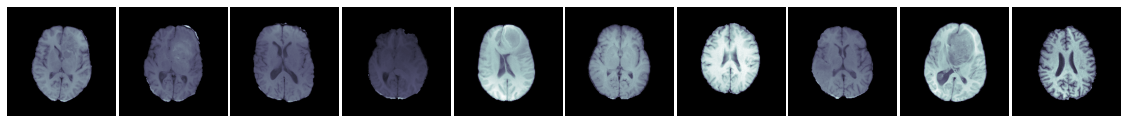

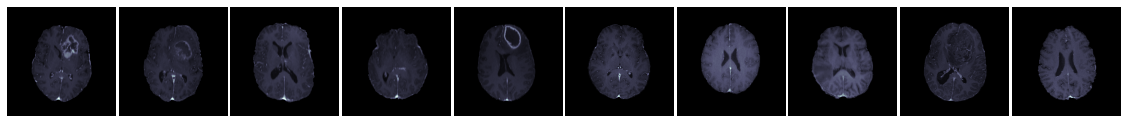

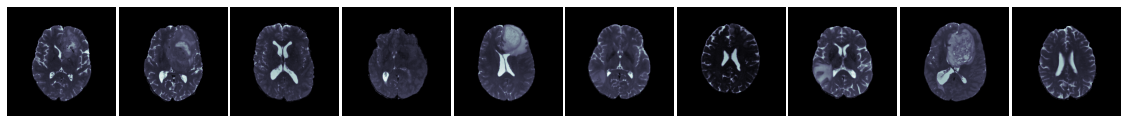

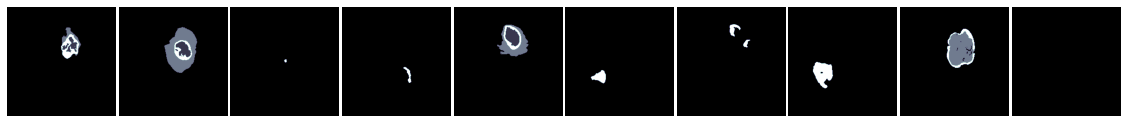

In [20]:
plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_flair = flair_nparrays[i]
  plt.imshow(ex_img_flair[slice_num, :, :], cmap="bone")
plt.show()

plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_t1 = t1_nparrays[i]
  plt.imshow(ex_img_t1[slice_num, :, :], cmap="bone")
plt.show()

plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_t1ce = t1ce_nparrays[i]
  plt.imshow(ex_img_t1ce[slice_num, :, :], cmap="bone")
plt.show()

plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_t2 = t2_nparrays[i]
  plt.imshow(ex_img_t2[slice_num, :, :], cmap="bone")
plt.show()

plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_seg = seg_nparrays[i]
  plt.imshow(ex_img_seg[slice_num,:, :], cmap="bone")
plt.show()

In [21]:
import numpy as np

images_arrays = flair_nparrays+t1_nparrays+t1ce_nparrays+t2_nparrays
seg_arrays = seg_nparrays
print(len(images_arrays))
print(len(seg_arrays))
print(images_arrays[0].shape)

96
24
(155, 240, 240)


In [22]:
patient= 0 #you can change this

@interact # https://youtu.be/rBIetBho0x4 <-- guided visualization from this video
def explore_3d_image(slice=(0,154), modality=["flair", "t1", "t1ce", "t2", "seg"], view=["axial", "coronal", "sagittal"]):
  if modality=="flair":
    img = flair_nparrays[patient]
  elif modality=="t1":
    img = t1_nparrays[patient]
  elif modality=="t1ce":
    img = t1ce_nparrays[patient]
  elif modality=="t2":
    img = t2_nparrays[patient]
  elif modality=="seg":
    img = seg_nparrays[patient]

  print()
  plt.title('Exploring Slices of the Image Data', fontsize=10)
  if view == "axial":
    img=img[slice, :, :]
  elif view == "coronal":
    img=img[:, :, slice]
  elif view == "sagittal":
    img=img[:, slice, :]

  plt.imshow(img, cmap="bone")
  plt.show()

interactive(children=(IntSlider(value=77, description='slice', max=154), Dropdown(description='modality', opti…

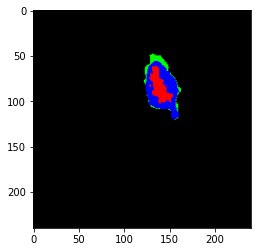

In [23]:
"""
- annotated manually- one to four raters + were approved by experienced neuro-radiologists
- Annotations comprise the
    - GD-enhancing tumor (ET — label 4)
    - peritumoral edematous/invaded tissue (ED — label 2)
    - necrotic tumor core (NCR — label 1)
"""

slice_index = 65
# just for visualization and to see color - will not permantly change the color slices (also we're just doing it to slices to view it)

for i in seg_nparrays:
  color_seg = np.zeros((240,240,3))
  gray_segmentation = i[slice_index,:,:]
  color_seg[gray_segmentation==1] = [255,0,0] # red - if in the array the value is 1 - NECROTIC TUMOUR CORE (NCR — label 1)
  color_seg[gray_segmentation==2] = [0,255,0] # green - if in the array the value is 2 - PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 2)
  color_seg[gray_segmentation==4] = [0,0,255] # blue - GD-ENHANCING TUMOUR (ET — label 4)
  plt.imshow(color_seg, cmap="bone")
  plt.show()
  break

# its because the annotations already have labels - so pixels that have 1 are necrotic tumour, pixels that have 2 are ed and pixels that have 7 are enhancing tumour
# so i dont think i should be changing it into range of 0-1 for preprocessing anyways

In [24]:
import math
import numpy as np
import cv2
import torch
import torchvision
from torchvision import transforms

In [25]:
def find_scale(size):
   return 128/size

In [26]:
from scipy.ndimage import zoom

def preprocess_resize(np_arrays):
  new_arrays = []
  for i in range(len(np_arrays)): # each volume
    img = np_arrays[i]
    # print(img.shape) # (155, 240, 240)
    a = zoom(input=img, zoom=(find_scale(img.shape[0]), find_scale(img.shape[1]), find_scale(img.shape[2])), order=0)
    # print(a.shape) # (128, 128, 128)
    new_arrays.append(a)
  return new_arrays

In [27]:
resized_t1_nparrays = preprocess_resize(t1_nparrays)
print(len(resized_t1_nparrays))
print(resized_t1_nparrays[0].shape)

24
(128, 128, 128)


In [68]:
all_nparrays = [flair_nparrays, t1_nparrays, t1ce_nparrays, t2_nparrays, seg_nparrays]
image_data = []

In [69]:
resized_arrs = []
for modality_arr in all_nparrays:
  resized_arr = preprocess_resize(modality_arr)
  print(resized_arr[0].shape)
  resized_arrs.append(resized_arr)

(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)


In [70]:
print(len(resized_arrs))
print(resized_arrs[1][0].shape)

5
(128, 128, 128)


In [ ]:
sample = resized_arrs[0][0]
print(sample.shape)
print(sample[0].shape)

for i in range(sample.shape[0]):
  plt.imshow(sample[i, :, :], cmap="bone")
  # print(str(i+1), labels[i])
  # brain_slice = sample[i][65, :, :] # [0] -> NECROTIC TUMOUR CORE
  # plt.imshow(brain_slice)
  plt.show()
  print(brain_slice.shape)

In [74]:
# print(len(seg_nparrays))
# resizedsegarr = preprocess_resize(seg_nparrays)
# print(resized_arr[0].shape)

In [ ]:
sample = resized_arrs[4][0]
print(sample.shape)
print(sample[0].shape)

labels = ["NECROTIC TUMOUR CORE (NCR — label 1)", "GD-ENHANCING TUMOUR (ET — label 4)", "PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 2)"]
for i in range(sample.shape[0]):
  plt.imshow(sample[i, :, :], cmap="bone")
  # print(str(i+1), labels[i])
  # brain_slice = sample[i][65, :, :] # [0] -> NECROTIC TUMOUR CORE
  # plt.imshow(brain_slice)
  plt.show()
  print(brain_slice.shape)

In [76]:
# def preprocess_randcrop(np_arrays):
#   new_arrays = []
#   crop_size = 128
#   for i in np_arrays: # each volume
#     # print(i.shape) # (155, 240, 240)
#     start = i.shape[1]//2 - 128//2
#     stop = i.shape[1] - start
#     slice_start = (i.shape[0]-crop_size)//2
#     slice_stop = i.shape[0]-14
#     # print(i.shape) # (128, 128, 128)
#     # print(start, stop)
#     # print(slice_start, slice_stop)
#     i = i[slice_start:slice_stop, start:stop, start:stop]
#     # print(i.shape)
#     new_arrays.append(i)
#   return new_arrays

# cropped_flair_nparrays = preprocess_randcrop(flair_nparrays)
# print(len(cropped_flair_nparrays))
# print(cropped_flair_nparrays[0].shape)
# cropped_t1_nparrays = preprocess_randcrop(t1_nparrays)
# cropped_t1ce_nparrays = preprocess_randcrop(t1ce_nparrays)
# cropped_t2_nparrays = preprocess_randcrop(t2_nparrays)

In [77]:
# cropped_flair_nparrays = preprocess_resize(flair_nparrays)
# print(len(cropped_flair_nparrays))
# print(cropped_flair_nparrays[0].shape)
# cropped_t1_nparrays = preprocess_resize(t1_nparrays)
# cropped_t1ce_nparrays = preprocess_resize(t1ce_nparrays)
# cropped_t2_nparrays = preprocess_resize(t2_nparrays)

In [78]:
# from scipy.ndimage import zoom

# def find_scale(size):
#    return 144/size

# def preprocess_resize(np_arrays):
#   new_arrays = []
#   for i in range(len(np_arrays)): # each volume
#     # print(i)
#     img = np_arrays[i]
#     # print(img.shape)
#     a = zoom(img, (find_scale(img.shape[0]), 1, 1))
#     # print(a.shape)
#     new_arrays.append(a)
#   return new_arrays
# # cropped_t1_nparrays = preprocess_resize(t1_nparrays)
# # print(len(cropped_t1_nparrays))
# # print(cropped_t1_nparrays[0].shape)

In [79]:
# new_f = np.expand_dims(cropped_flair_nparrays[0], axis=0)
# new_t1 = np.expand_dims(cropped_t1_nparrays[0], axis=0)
# new_t1ce = np.expand_dims(cropped_t1ce_nparrays[0], axis=0)
# new_t2 = np.expand_dims(cropped_t2_nparrays[0], axis=0)
# new = np.concatenate((new_f, new_t1, new_t1ce, new_t2), axis=0)
# print(new.shape)

# news_f = np.expand_dims(cropped_flair_nparrays[1], axis=0)
# news_t1 = np.expand_dims(cropped_t1_nparrays[1], axis=0)
# news_t1ce = np.expand_dims(cropped_t1ce_nparrays[1], axis=0)
# news_t2 = np.expand_dims(cropped_t2_nparrays[1], axis=0)
# news = np.concatenate((news_f, news_t1, news_t1ce, news_t2), axis=0)
# print(news.shape)

In [80]:
# def one_mean(volume):
#   total_pixels = volume.shape[0]*volume.shape[1]*volume.shape[2]
#   pixels_sum = 0
#   for i in range(volume.shape[0]): # for each channel
#     channel_sum = 0
#     # slice_num = 0
#     for j in range(volume.shape[1]): # for each slice
#       current_slice = volume[j, :, :]
#       current_slice_sum = current_slice.sum()
#       channel_sum += current_slice_sum
#       # slice_num += 1
#     # print("channel " + str(i+1) + " done")
#     # print("slices: " + str(slice_num))
#     # print()
#     pixels_sum += channel_sum
#   # print("one image done")
#   # print("\nmean:")
#   # print(pixels_sum/total_pixels)
#   print(np.mean(volume))
#   print(pixels_sum/total_pixels)
#   return pixels_sum/total_pixels
    
# # mean_one = one_mean(new)
# # print(mean_one)
# # print(np.mean(new))

In [81]:
# def one_mean(volume):
#   # print(volume.shape)
#   total_pixels = volume.shape[0]*volume.shape[1]*volume.shape[2]
#   pixels_sum = 0
#   for i in range(volume.shape[0]): # for each slice
#     current_slice = volume[i, :, :]
#     current_slice_sum = current_slice.sum()
#     pixels_sum += current_slice_sum
#   # print(np.mean(volume))
#   # print(pixels_sum/total_pixels)
#   return pixels_sum/total_pixels
    
# # mean_one = one_mean(new)
# # print(mean_one)
# # print(np.mean(new))

In [82]:
# def total_mean(volumes):
#   total_mean1 = 0
#   total_mean2 = 0
#   for i in volumes:
#     # print(i.shape)
#     # print(one_mean)
#     total_mean1 += one_mean(i)
#     total_mean2 += np.mean(i)
#     continue
#   mean1 = total_mean1/len(volumes)
#   mean2 = total_mean2/len(volumes)
#   # print(mean1)
#   # print(mean2)
#   return mean1

# # total_mean([new, news]) # these images are 155x240x240

In [83]:
# def one_std(mean, volume):
#   # print(volume.shape)
#   total_pixels = volume.shape[0]*volume.shape[1]*volume.shape[2]
#   total_squared_sum_error = 0
#   for i in range(volume.shape[1]): # for each slice
#     current_slice = volume[i, :, :]
#     total_squared_sum_error += ((current_slice-mean)**2).sum()
#   # print(math.sqrt(total_squared_sum_error/total_pixels))
#   # print(np.std(volume))
#   return math.sqrt(total_squared_sum_error/total_pixels)
    
# # std = one_std(183.8947878689236, new)
# # print(std)
# # print(np.std(new))

In [84]:
# def total_std(mean, volumes):
#   total_std1 = 0
#   total_std2 = 0
#   for i in volumes:
#     total_std1 += one_std(mean, i)
#     total_std2 += np.std(i)
#     # print(one_std(i))
#     # print(np.std(i))
#     # print()
#   std1 = total_std1/len(volumes)
#   std2 = total_std2/len(volumes)
#   # print(std1)
#   # print(std2)
#   return std1

# # total_std(170.13654495804397, [new, news]) # these images are 155x240x240

In [85]:
# def total_mean(volumes):
#   total_std1 = 0
#   for i in volumes:
#     total_std1 += one_std(i)
#   std = total_std1/len(volumes)
#   print(std)

#   total_std2 = 0
#   for i in volumes:
#     total_std2 += np.std(i)
#   npstd = total_std2/len(volumes)
#   print(npstd)

In [86]:
# print(find_mean(images_arrays[2]))
# print(np.mean(images_arrays[2]))

In [87]:
# total_mean = 0
# for i in images_arrays:
#   total_mean += find_mean(i)
# mean = total_mean/len(images_arrays)
# print(mean)
# print(np.mean(images_arrays))

In [88]:
# def find_std(volume):
#   total_pixels = 155*240*240
#   squared_sum_error = 0
#   # print(volume.shape)
#   for i in range(155):
#     current_slice = volume[i, :, :] # got the current slice
#     squared_sum_error += ((current_slice-mean)**2).sum()
#   return math.sqrt(squared_sum_error/total_pixels)

In [89]:
# print(find_std(images_arrays[2]))
# print(np.std(images_arrays[2]))

In [90]:
# total_std1 = 0
# for i in images_arrays:
#   total_std1 += find_std(i)
# std = total_std1/len(images_arrays)
# print(std)

# total_std2 = 0
# for i in images_arrays:
#   total_std2 += np.std(i)
# npstd = total_std2/len(images_arrays)
# print(npstd)

In [91]:
"""
my standard deviation is very similar, but there’s a difference by a few decimal points.
Darien mentioned in one of our first calls a few weeks ago that the values when done manually and with numpy might be a bit off,
so im curious to know why that might be the case

matlab/pandas and numpy have diff answers because matlab has unbiased estimator
(https://www.aboutdatablog.com/post/why-computing-standard-deviation-in-pandas-and-numpy-yields-different-results)
but here im following the exact formula in numpy

those differences accumulate in order to have a few values off in the final std of the whole dataset. is that okay? even then, why is it the case?

https://kozodoi.me/python/deep%20learning/pytorch/tutorial/2021/03/08/image-mean-std.html <-- also tried new formula, but didn't work (showed error)
"""

"\nmy standard deviation is very similar, but there’s a difference by a few decimal points.\nDarien mentioned in one of our first calls a few weeks ago that the values when done manually and with numpy might be a bit off,\nso im curious to know why that might be the case\n\nmatlab/pandas and numpy have diff answers because matlab has unbiased estimator\n(https://www.aboutdatablog.com/post/why-computing-standard-deviation-in-pandas-and-numpy-yields-different-results)\nbut here im following the exact formula in numpy\n\nthose differences accumulate in order to have a few values off in the final std of the whole dataset. is that okay? even then, why is it the case?\n\nhttps://kozodoi.me/python/deep%20learning/pytorch/tutorial/2021/03/08/image-mean-std.html <-- also tried new formula, but didn't work (showed error)\n"

In [92]:
# print("Mean: " + str(mean) + " ----- " + "Standard Deviation: " + str(std))

In [93]:
# # preprocessing
# """
# - write down what i need to do for that step
# - will get (1x128x128x128 for this)
# """
# def img_preprocess_array(modalities_arr):
#   image_data = []

#   resized_arrs = []
#   for modality_arr in modalities_arr:
#       cropped_arr = preprocess_resize(modality_arr)
#       print(cropped_arr[0].shape)
#       resized_arrs.append(cropped_arr)
#   print(len(resized_arrs))
#   print(len(resized_arrs[1]))
#   # print(cropped_arrs[3][0].shape)

#   # concat
#   concatenated_arrs = concat_modalities(resized_arrs[0], resized_arrs[1], resized_arrs[2], resized_arrs[3])
#   print(len(concatenated_arrs))
#   print(concatenated_arrs[0].shape)

#   # find mean and std
#   mean = total_mean(concatenated_arrs) # the images I tried on before were 155x240x240 and the mean was around the 175 mark
#   # ^the reason why the mean is a lot higher (about 753.58) is because you are removing a lot of pixels from the edges and taking out slices with spase information (which has pixel values of 0)
#   # taking out 0 values automatically inflates the mean
#   std = total_std(mean, concatenated_arrs)
#   print()
#   print(mean, std)
#   print()
#   for concat_arr in concatenated_arrs:
#     transformed_channels = []
#     for channel in concat_arr: 
#       print(channel.shape)
#       transform = transforms.Compose([transforms.ToTensor(),
#                                       transforms.ConvertImageDtype(torch.float32),
#                                       transforms.Normalize(mean, std)]) # done in the same order as mentioned
#                                       # for normalization Given mean: (mean[1],...,mean[n]) and std: (std[1],..,std[n]) for n channels, this transform will normalize each channel of the input torch
#                                       # Tensor i.e., output[channel] = (input[channel] - mean[channel]) / std[channel]
#                                       # so it's okay if you do one channel at a time, but still use the same mean and std as the volume would use
#       channel = transform(channel)
#       print(channel.shape)
#       transformed_channels.append(channel)
#     new_tc0 = np.expand_dims(transformed_channels[0], axis=0)
#     new_tc1 = np.expand_dims(transformed_channels[1], axis=0)
#     new_tc2 = np.expand_dims(transformed_channels[2], axis=0)
#     new_tc3 = np.expand_dims(transformed_channels[3], axis=0)
#     image_data.append(np.concatenate((new_tc0, new_tc1, new_tc2, new_tc3), axis=0))
    
#   print(len(image_data))
#   print(image_data[0].shape)

#   return image_data
#   # return concatenated_arrs

# image_data = img_preprocess_array([flair_nparrays, t1_nparrays, t1ce_nparrays, t2_nparrays])

In [98]:
# print(resized_seg_arrays.shape)
# print(resized_seg_arrays[0].shape)
# print(resized_seg_arrays[0][0].shape)

In [101]:
# make data loaders and stuff
"""
To analyze our results a split was made by patient,
such that 70% of the data (147 patients) was the training set and 30% the validation
set (63 patients). 

The BRATS 2017 high grade glioma database [6–9] containing 210 patients is split into
training set (70%) and test set (30%).

I'll go with 70:15:15
"""

"\nTo analyze our results a split was made by patient,\nsuch that 70% of the data (147 patients) was the training set and 30% the validation\nset (63 patients). \n\nThe BRATS 2017 high grade glioma database [6–9] containing 210 patients is split into\ntraining set (70%) and test set (30%).\n\nI'll go with 70:15:15\n"

24 24 24 24 24
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
24 24 24 24 24
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

False
False


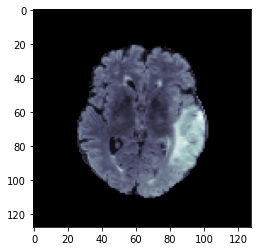

24


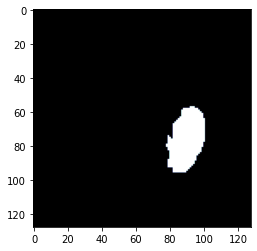

In [121]:
image_seg_data = list(zip(resized_arrs[0], resized_arrs[1], resized_arrs[2], resized_arrs[3], resized_arrs[4]))
# print(len(image_seg_data[0][0]))
check_flair = []
check_t1 = []
check_t1ce = []
check_t2 = []
check_segs = []
for i in image_seg_data:
  check_flair.append(i[0])
  check_t1.append(i[1])
  check_t1ce.append(i[2])
  check_t2.append(i[3])
  check_segs.append(i[4])
print(len(check_flair), len(check_t1), len(check_t1ce), len(check_t2), len(check_segs))
print(check_flair[0][100])

import random
shuffled_flair = []
shuffled_t1 = []
shuffled_t1ce = []
shuffled_t2 = []
shuffled_segs = []
random.shuffle(image_seg_data)
for i in image_seg_data:
  shuffled_flair.append(i[0])
  shuffled_t1.append(i[1])
  shuffled_t1ce.append(i[2])
  shuffled_t2.append(i[3])
  shuffled_segs.append(i[4])
print(len(shuffled_flair), len(shuffled_t1), len(shuffled_t1ce), len(shuffled_t2), len(shuffled_segs))
print(shuffled_flair[0][100])

print()
# print(check_flair == shuffled_flair) -- doesn't work this way
print(np.array_equal(check_flair[0], shuffled_flair[0]))
print(np.array_equal(check_flair, shuffled_flair))

plt.imshow(shuffled_flair[3][60, :, :], cmap="bone")
plt.show()
plt.close()
print(len(shuffled_segs))
plt.imshow(shuffled_segs[3][60, :, :], cmap="bone")
plt.show()
plt.close()

In [123]:
len_images = len(shuffled_segs)

v_t_datasize = int(len_images*0.15)
print(v_t_datasize)
training_datasize = len_images - (v_t_datasize*2)
print(training_datasize)
print(v_t_datasize+v_t_datasize+training_datasize == len_images)

3
18
True


In [228]:
def make_dataset(start_idx, end_idx):
  image_dataset = [shuffled_flair[start_idx:end_idx], shuffled_t1[start_idx:end_idx], shuffled_t1ce[start_idx:end_idx], shuffled_t2[start_idx:end_idx]]
  segmentation_dataset = shuffled_segs[start_idx:end_idx]
  # return list(zip(image_dataset, segmentation_dataset))
  print(len(image_dataset),len(segmentation_dataset))
  return image_dataset, segmentation_dataset

training_images, training_segmentations = make_dataset(0, training_datasize)
validation_images, validation_segmentations = make_dataset(training_datasize, training_datasize+v_t_datasize)
testing_images, testing_segmentations = make_dataset(training_datasize+v_t_datasize, len_images)

print()
print(len(training_images), len(training_segmentations))
print(len(training_images[0]), len(training_segmentations[0]))
print()

print(len(validation_images), len(validation_segmentations))
print(len(validation_images[0]), len(validation_segmentations))
print()

print(len(testing_images), len(testing_segmentations))
print(len(testing_images[0]), len(testing_segmentations))

print()
print(len(training_images[0]))
print(len(training_images[1]))
print(len(training_images[2]))
print(len(training_images[3]))

print()
print(training_images[0][0].shape)
print(validation_images[0][0].shape)
print(testing_images[0][0].shape)

4 18
4 3
4 3

4 18
18 128

4 3
3 3

4 3
3 3

18
18
18
18

(128, 128, 128)
(128, 128, 128)
(128, 128, 128)


(128, 128, 128)


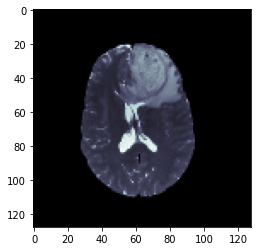

(128, 128, 128)


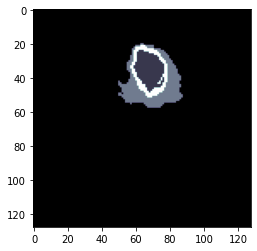

In [229]:
print(training_images[0][0].shape)
plt.imshow(training_images[3][10][60, :, :], cmap="bone") # [modality][image number][128x128x128]
plt.show()
plt.close()

print(training_segmentations[0].shape)
plt.imshow(training_segmentations[10][60, :, :], cmap="bone") # [image number][channels][128x128x128]
plt.show()
plt.close()

(128, 128, 128)


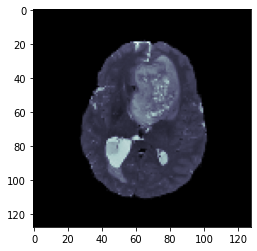

(128, 128, 128)


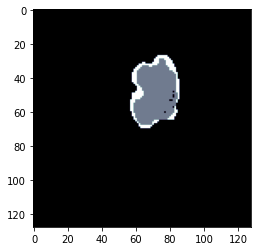

In [230]:
print(validation_images[0][0].shape)
plt.imshow(validation_images[3][2][60, :, :], cmap="bone") # [modality][image number][128x128x128]
plt.show()
plt.close()

print(validation_segmentations[0].shape)
plt.imshow(validation_segmentations[2][60, :, :], cmap="bone") # [image number][channels][128x128x128]
plt.show()
plt.close()

(128, 128, 128)


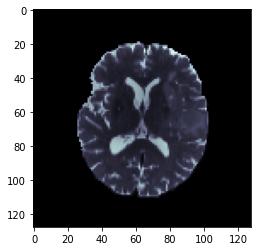

(128, 128, 128)


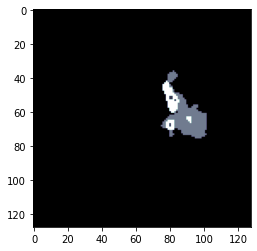

In [231]:
print(testing_images[0][0].shape)
plt.imshow(testing_images[3][1][60, :, :], cmap="bone") # [modality][image number][128x128x128]
plt.show()
plt.close()

print(testing_segmentations[0].shape)
plt.imshow(testing_segmentations[1][60, :, :], cmap="bone") # [image number][channels][128x128x128]
plt.show()
plt.close()

In [128]:
# def modality_mean(modality_array):
#   for i in volumes:
# #     # print(i.shape)
# #     # print(one_mean)
# #     total_mean1 += one_mean(i)
# #     total_mean2 += np.mean(i)
# #     continue

In [224]:
# # find mean and std
# print(resized_arrs[0][0][0])
# for modality_arr in resized_arrs:
#   for arr in modality_arr:
#     # print(arr.shape)
#     mean = one_mean(arr)
#     std = one_std(mean, arr)
#     print(mean, std)
#     for channel in arr: # not sure if I can do image = (image-mean)/std, but I used this because torch.tensor normalizes each channel of the input
#       # print(arr.shape)
#       # print(channel.shape)
#       # print(channel)
#       print(channel[0])
#       channel = (channel-mean)/std
#       print(channel[0]) #it works because you can see the shift in pixel values - the only issue is that I couldn't get the resized arrays to update. but, since my intention was to implement the formula, i think it's good enough atp
#       # what i could have probably done is made functions just like i did 
#       print()
#       break
#     # print(mean, std)
# # mean = total_mean(concatenated_arrs) # the images I tried on before were 155x240x240 and the mean was around the 175 mark
# # # ^the reason why the mean is a lot higher (about 753.58) is because you are removing a lot of pixels from the edges and taking out slices with spase information (which has pixel values of 0)
# # taking out 0 values automatically inflates the mean
# # std = total_std(mean, concatenated_arrs)
# # print()
# # print(mean, std)
# # print()
# print(resized_arrs[0][0][0])

In [232]:
def find_mean_modality(modality_array):
  # print(len(modality_array))
  # print(modality_array[0].shape)
  total_pixels = len(modality_array)*modality_array[0].shape[0]*modality_array[0].shape[1]*modality_array[0].shape[2]
  pixels_sum = 0
  # print(total_pixels)
  for i in modality_array:
    # print(i.shape)
    pixels_sum += i.sum()
  # print(pixels_sum)
  return pixels_sum/total_pixels
  #   print(one_mean(i))
  #   total_mean1 += one_mean(i)
  #   total_mean2 += np.mean(i)
  #   # print(modality_array[image_vol])
  #   # print(modality_array[image_vol].shape)
  #   modality_array[image_vol] = apply_norm_each_volume(modality_array, image_vol)
    # print(modality_array[image_vol])

mean_flair = find_mean_modality(training_images[0])
mean_t1 = find_mean_modality(training_images[1])
mean_t1ce = find_mean_modality(training_images[2])
mean_t2 = find_mean_modality(training_images[3])
print(mean_flair, mean_t1, mean_t1ce, mean_t2)
# all_nparrays = [flair_nparrays, t1_nparrays, t1ce_nparrays, t2_nparrays]

# 171.8281400733524
# 161.24379261334738
# 389.4269491036733
# 106.96135830879211

168.29866835806104 150.05797407362195 371.7773011525472 98.97091155582004


In [233]:
def find_std_modality(mean, modality_array):
  # print(len(modality_array))
  # print(modality_array[0].shape)
  total_pixels = len(modality_array)*modality_array[0].shape[0]*modality_array[0].shape[1]*modality_array[0].shape[2]
  total_squared_sum_error = 0
  # print(total_pixels)
  for i in modality_array:
    # print(i.shape)
    total_squared_sum_error += ((i-mean)**2).sum()
  return math.sqrt(total_squared_sum_error/total_pixels)
  # print(pixels_sum)
  # return pixels_sum/total_pixels
  #   print(one_mean(i))
  #   total_mean1 += one_mean(i)
  #   total_mean2 += np.mean(i)
  #   # print(modality_array[image_vol])
  #   # print(modality_array[image_vol].shape)
  #   modality_array[image_vol] = apply_norm_each_volume(modality_array, image_vol)
    # print(modality_array[image_vol])

# 426.3266943989341 389.29038836731905 918.1716566219271 272.43761357825645

std_flair = find_std_modality(mean_flair, training_images[0])
std_t1 = find_std_modality(mean_t1, training_images[1])
std_t1ce = find_std_modality(mean_t1ce, training_images[2])
std_t2 = find_std_modality(mean_t2, training_images[3])

print(std_flair, std_t1, std_t1ce, std_t2)

# 419.0634863030751
# 412.7133184808439
# 939.6843017049572
# 283.91136614391854

416.74536931822394 392.734250007242 902.3813835516 266.97555180437394


In [234]:
def apply_norm_each_modality(mean, std, modality_array):
  # print(len(modality_array))
  for image_vol in range(len(modality_array)):
    # print(modality_array[image_vol])
    # print(modality_array[image_vol].shape)
    modality_array[image_vol] = apply_norm_each_volume(mean, std, modality_array, image_vol)
    # print(modality_array[image_vol])
  return modality_array

In [235]:
def apply_norm_each_volume(mean, std, modality_array, img_vol):
  modality_array[img_vol] = (modality_array[img_vol]-mean)/std
  return modality_array[img_vol]

In [236]:
print(len(training_images))
print(len(validation_images))
print(len(testing_images))

print(len(training_images[0]))
print(len(validation_images[0]))
print(len(testing_images[0]))

4
4
4
18
3
3


In [237]:
# print(training_images[0][0])
# training_images[0] = apply_norm_each_modality(mean_flair, std_flair, training_images[0])
# print(training_images[0][0])

In [ ]:
normalized_flair_trnparrays = apply_norm_each_modality(mean_flair, std_flair, training_images[0])
print(normalized_flair_trnparrays[0][0])
print()
print()

normalized_t1_trnparrays = apply_norm_each_modality(mean_t1, std_t1, training_images[1])
print(normalized_t1_trnparrays[0][0])
print()
print()

normalized_t1ce_trnparrays = apply_norm_each_modality(mean_t1ce, std_t1ce, training_images[2])
print(normalized_t1ce_trnparrays[0][0])
print()
print()

normalized_t2_trnparrays = apply_norm_each_modality(mean_t2, std_t2, training_images[3])
print(normalized_t2_trnparrays[0][0])
print()

tr_normalized_arrays= [normalized_flair_trnparrays, normalized_t1_trnparrays, normalized_t1ce_trnparrays, normalized_t2_trnparrays]

In [ ]:
normalized_flair_vnparrays = apply_norm_each_modality(mean_flair, std_flair, validation_images[0])
print(normalized_flair_vnparrays[0][0])
print()
print()

normalized_t1_vnparrays = apply_norm_each_modality(mean_t1, std_t1, validation_images[1])
print(normalized_t1_vnparrays[0][0])
print()
print()

normalized_t1ce_vnparrays = apply_norm_each_modality(mean_t1ce, std_t1ce, validation_images[2])
print(normalized_t1ce_vnparrays[0][0])
print()
print()

normalized_t2_vnparrays = apply_norm_each_modality(mean_t2, std_t2, validation_images[3])
print(normalized_t2_vnparrays[0][0])
print()

v_normalized_arrays= [normalized_flair_vnparrays, normalized_t1_vnparrays, normalized_t1ce_vnparrays, normalized_t2_vnparrays]

In [ ]:
normalized_flair_tenparrays = apply_norm_each_modality(mean_flair, std_flair, testing_images[0])
print(normalized_flair_tenparrays[0][0])
print()
print()

normalized_t1_tenparrays = apply_norm_each_modality(mean_t1, std_t1, testing_images[1])
print(normalized_t1_tenparrays[0][0])
print()
print()

normalized_t1ce_tenparrays = apply_norm_each_modality(mean_t1ce, std_t1ce, testing_images[2])
print(normalized_t1ce_tenparrays[0][0])
print()
print()

normalized_t2_tenparrays = apply_norm_each_modality(mean_t2, std_t2, testing_images[3])
print(normalized_t2_tenparrays[0][0])
print()

te_normalized_arrays= [normalized_flair_tenparrays, normalized_t1_tenparrays, normalized_t1ce_tenparrays, normalized_t2_tenparrays]

(128, 128, 128)


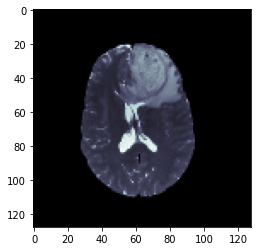

(128, 128, 128)


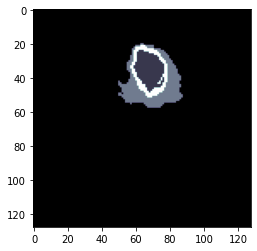

In [241]:
print(tr_normalized_arrays[0][0].shape)
plt.imshow(tr_normalized_arrays[3][10][60, :, :], cmap="bone") # [modality][image number][128x128x128]
plt.show()
plt.close()

print(training_segmentations[0].shape)
plt.imshow(training_segmentations[10][60, :, :], cmap="bone") # [image number][channels][128x128x128]
plt.show()
plt.close()

(128, 128, 128)


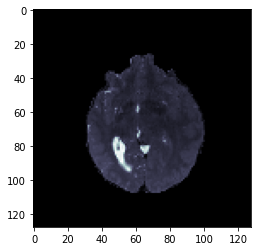

(128, 128, 128)


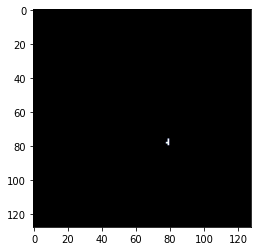

In [242]:
print(v_normalized_arrays[0][0].shape)
plt.imshow(v_normalized_arrays[3][1][60, :, :], cmap="bone") # [modality][image number][128x128x128]
plt.show()
plt.close()

print(validation_segmentations[0].shape)
plt.imshow(validation_segmentations[1][60, :, :], cmap="bone") # [image number][channels][128x128x128]
plt.show()
plt.close()

(128, 128, 128)


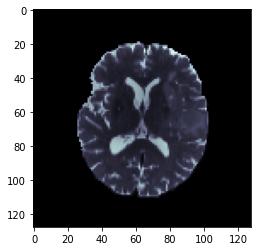

(128, 128, 128)


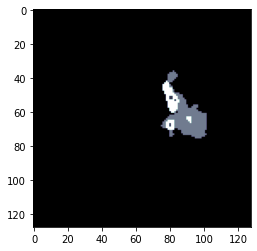

In [243]:
print(te_normalized_arrays[0][0].shape)
plt.imshow(te_normalized_arrays[3][1][60, :, :], cmap="bone") # [modality][image number][128x128x128]
plt.show()
plt.close()

print(testing_segmentations[0].shape)
plt.imshow(testing_segmentations[1][60, :, :], cmap="bone") # [image number][channels][128x128x128]
plt.show()
plt.close()

In [244]:
def dataset_transform(tvt_image_dataset, tvt_seg_dataset):
  # print(type(tvt_image_dataset[0][0]))
  # print(len(tvt_image_dataset))
  # print(len(tvt_seg_dataset))
  for volumes in range(len(tvt_seg_dataset)): 
    # print(tvt_seg_dataset[volumes].shape)
    tvt_seg_dataset[volumes] = np.array(tvt_seg_dataset[volumes], dtype="float32")
    transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.ConvertImageDtype(torch.float32)]) # done in the same order as mentioned 
    # vols =  transform(tvt_seg_dataset[volumes])
    tvt_seg_dataset[volumes] = transform(tvt_seg_dataset[volumes])
    tvt_seg_dataset[volumes] = tvt_seg_dataset[volumes].permute(1,2,0)
    # print(tvt_seg_dataset[volumes].shape)
    # print(tvt_seg_dataset[volumes].shape)
    # print(tvt_seg_dataset[volumes].dtype)
    # print()

  # # print("onto images")
  # # print()
  for modal in range(len(tvt_image_dataset)):
    for volumes in range(len(tvt_image_dataset[modal])): 
      # print(tvt_image_dataset[modal][volumes].shape)
      tvt_image_dataset[modal][volumes] = np.array(tvt_image_dataset[modal][volumes], dtype="float32")
      # print(tvt_image_dataset[modal][volumes].shape)
      transform  = transforms.Compose([transforms.ToTensor(),
                                      transforms.ConvertImageDtype(torch.float32)]) # done in the same order as mentioned 
      tvt_image_dataset[modal][volumes] = transform(tvt_image_dataset[modal][volumes])
      tvt_image_dataset[modal][volumes] = tvt_image_dataset[modal][volumes].permute(1,2,0)
      # print(tvt_image_dataset[modal][volumes].shape)
      # print(tvt_image_dataset[modal][volumes].shape)
      # print(tvt_image_dataset[modal][volumes].dtype)
      # print()
  return tvt_image_dataset, tvt_seg_dataset

In [245]:
training_images, training_segmentations = dataset_transform(tr_normalized_arrays, training_segmentations)

4
18
18
128
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([128, 128, 128])
torch.Size([128, 128, 128])
torch.float32
torch.float32


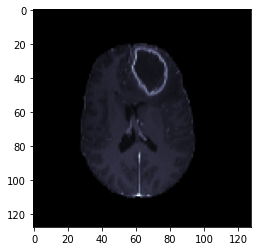

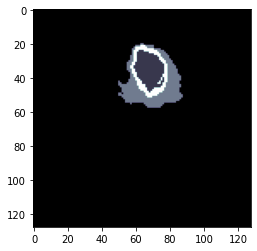

In [246]:
print(len(training_images))
print(len(training_images[0])) # modalities

print(len(training_segmentations))
print(len(training_segmentations[0])) # channels

imgg = training_images[1][1]
segg = training_segmentations[1]

# check to see the type and shape (ensures that this is the same as the previous code with transforms.Compose)
print(type(imgg))
print(type(segg))
print(imgg.shape)
print(segg.shape)
print(imgg.dtype)
print(segg.dtype)

sliceimg = imgg[60, :, :]
sliceseg = segg[60, :, :]

plt.imshow(training_images[2][10][60,:,:], cmap="bone")
plt.show()
plt.close()
plt.imshow(training_segmentations[10][60,:,:], cmap="bone")
plt.show()
plt.close()

In [247]:
validation_images, validation_segmentations = dataset_transform(validation_images, validation_segmentations)

4
3
3
128
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([128, 128, 128])
torch.Size([128, 128, 128])
torch.float32
torch.float32


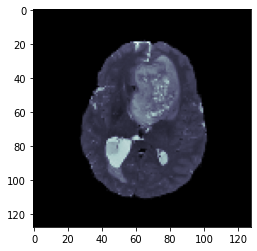

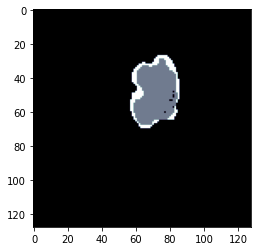

In [248]:
print(len(validation_images))
print(len(validation_images[0])) # modalities

print(len(validation_segmentations))
print(len(validation_segmentations[0])) # channels

imgg = validation_images[1][1]
segg = validation_segmentations[1]

# check to see the type and shape (ensures that this is the same as the previous code with transforms.Compose)
print(type(imgg))
print(type(segg))
print(imgg.shape)
print(segg.shape)
print(imgg.dtype)
print(segg.dtype)

sliceimg = imgg[60, :, :]
sliceseg = segg[60, :, :]

plt.imshow(validation_images[3][2][60,:,:], cmap="bone")
plt.show()
plt.close()
plt.imshow(validation_segmentations[2][60,:,:], cmap="bone")
plt.show()
plt.close()

In [250]:
testing_images, testing_segmentations = dataset_transform(testing_images, testing_segmentations)

4
128
3
128
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([128, 128, 128])
torch.Size([128, 128, 128])
torch.float32
torch.float32


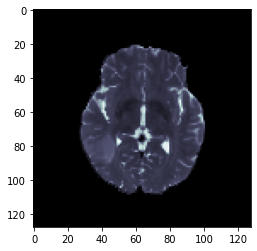

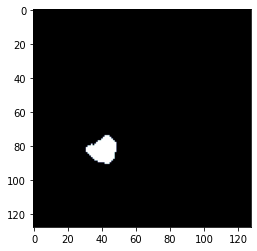

In [251]:
print(len(testing_images))
print(len(testing_segmentations[0])) # modalities

print(len(validation_segmentations))
print(len(testing_segmentations[0])) # channels

imgg = testing_images[1][1]
segg = testing_segmentations[1]

# check to see the type and shape (ensures that this is the same as the previous code with transforms.Compose)
print(type(imgg))
print(type(segg))
print(imgg.shape)
print(segg.shape)
print(imgg.dtype)
print(segg.dtype)

sliceimg = imgg[60, :, :]
sliceseg = segg[60, :, :]

plt.imshow(testing_images[3][2][60,:,:], cmap="bone")
plt.show()
plt.close()
plt.imshow(testing_segmentations[2][60,:,:], cmap="bone")
plt.show()
plt.close()

In [252]:
# def apply_norm_each_modality(modality_array):
#   # print(len(modality_array))
#   for image_vol in range(len(modality_array)):
#     # print(modality_array[image_vol])
#     # print(modality_array[image_vol].shape)
#     modality_array[image_vol] = apply_norm_each_volume(modality_array, image_vol)
#     # print(modality_array[image_vol])
#   return modality_array

In [253]:
# def apply_norm_each_volume(modality_array, img_vol):
#   mean = one_mean(modality_array[img_vol])
#   std = one_std(mean, modality_array[img_vol])
#   # print(modality_array[img_vol][0])
#   # image_vol = (modality_array[img_vol]-mean)/std
#   modality_array[img_vol] = (modality_array[img_vol]-mean)/std
#   # print((modality_array[img_vol]-mean)/std)
#   # print(modality_array[img_vol][0])
#   # print()
#   # print()
#   # print()
#   # print()
#   # print(modality_array[img_vol])
#   # for channel in range(modality_array[img_vol][0].shape[0]):
#   #   modality_array[img_vol][channel] = apply_norm_each_channel(modality_array, img_vol, channel, mean, std)
#   #   break
#   return modality_array[img_vol]

In [254]:
# def apply_norm_each_channel(modality_array, img_vol, channel, mean, std):
# #    print(modality_array[img_vol][channel])
#    modality_array[img_vol][channel] = (modality_array[img_vol][channel]-mean)/std
# #    print((modality_array[img_vol][channel]-mean)/std)
# #    print(modality_array[img_vol][channel])
# #    print()
# #    print()
# #    print()
# #    print()
#    return modality_array[img_vol][channel]

In [255]:
# # for modality in range(len(resized_arrs)): # each modality
# print(resized_arrs[0][0])
# print()
# resized_arrs[0] = apply_norm_each_modality(resized_arrs[0])
# print()
# print(resized_arrs[0][0])

In [256]:
# # find mean and std
# resized_arrs = resized_arrs
# print(resized_arrs[0][0][0])
# for modality in range(len(resized_arrs)): # each modality
#   modality_arr = resized_arrs[modality]
#   # print("i=" + str(modality+1))
#   for image_vol in range(len(modality_arr)): # each image volume
#     arr = modality_arr[image_vol]
#     # print("j=" + str(image_vol+1))
#     # print(resized_arrs[modality][image_vol].shape)
#     mean = one_mean(arr)
#     std = one_std(mean, arr)
#     # print(mean, std)
#     # print(mean, std)
#     # print(resized_arrs[modality][image_vol][0].shape[0])
#     for channel in range(arr[0].shape[0]): # not sure if I can do image = (image-mean)/std, but I used this because torch.tensor normalizes each channel of the input
#       ch = arr[channel]
#       # print("channel: " + str(channel))
#       # print(resized_arrs[modality][image_vol][channel].shape)
#       # print(resized_arrs[modality][image_vol][channel][0])
#       print(resized_arrs[modality][image_vol][channel])
#       resized_arrs[modality][image_vol][channel] = (resized_arrs[modality][image_vol][channel]-mean)/std
#       print((resized_arrs[modality][image_vol][channel]-mean)/std)
#       print(resized_arrs[modality][image_vol][channel])
#       print()
#     break
#     # print(mean, std)
# # mean = total_mean(concatenated_arrs) # the images I tried on before were 155x240x240 and the mean was around the 175 mark
# # # ^the reason why the mean is a lot higher (about 753.58) is because you are removing a lot of pixels from the edges and taking out slices with spase information (which has pixel values of 0)
# # # taking out 0 values automatically inflates the mean
# # std = total_std(mean, concatenated_arrs)
# # # print()
# # print(mean, std)
# # # print()
# print(resized_arrs[0][0][0])

In [257]:
# transformed_tensors = []
# for norm_arrs in normalized_arrays:
#   # print(concat_arr.shape)
#   transformed_vols = []
#   for volumes in range(len(norm_arrs)): 
#     # print(norm_arrs[volumes].shape)
#     transform = transforms.Compose([transforms.ToTensor(),
#                                     transforms.ConvertImageDtype(torch.float32)]) # done in the same order as mentioned 
#     vols =  transform(norm_arrs[volumes])
#     transformed_vols.append(vols)
#     # for image_volume in range(norm_arrs[volumes].shape[0]):
#     #   print(norm_arrs[volumes][image_volume].shape)
#     #   transform = transforms.Compose([transforms.ToTensor(),
#     #                                   transforms.ConvertImageDtype(torch.float32)]) # done in the same order as mentioned                                 
#     #   vol = transform(norm_arrs[volumes][image_volume]) # You have to have your tensor (as error message states) in 2 (H x W) or 3 (C x H x W) dimensions.
#     #   # print(vol.shape)
#     #   transformed_vols.append(vol)
#   print(len(transformed_vols))
#   transformed_tensors.append(transformed_vols)

# print(len(transformed_tensors))
# print(len(transformed_tensors[0]))
# print(transformed_tensors[0][0].shape)

In [258]:
def expand_images(transformed_ten):
  print(len(transformed_ten))
  for i in range(len(transformed_ten)):
    volumes = transformed_ten[i]
    for image_volume in range(len(volumes)):
      # print(volumes[image_volume].shape)
      transformed_ten[i][image_volume] = torch.unsqueeze(volumes[image_volume], axis=0)
      # print(volumes[image_volume].shape)
  return transformed_ten

In [259]:
expanded_trimages = expand_images(training_images)
expanded_vimages = expand_images(validation_images)
expanded_teimages = expand_images(testing_images)

4
4
4


In [260]:
print(expanded_trimages[0][0].shape)
print(expanded_vimages[0][0].shape)
print(expanded_teimages[0][0].shape)

torch.Size([1, 128, 128, 128])
torch.Size([1, 128, 128, 128])
torch.Size([1, 128, 128, 128])


In [261]:
def expand_segmentations(transformed_ten):
  print(len(transformed_ten))
  for seg_volume in range(len(transformed_ten)):
    # print(transformed_ten[seg_volume].shape)
    transformed_ten[seg_volume] = torch.unsqueeze(transformed_ten[seg_volume], axis=0)
    # print(transformed_ten[seg_volume].shape)
  return transformed_ten

In [262]:
trseg_data = expand_segmentations(training_segmentations)
vseg_data = expand_segmentations(validation_segmentations)
teseg_data = expand_segmentations(testing_segmentations)

18
3
3


In [263]:
print(trseg_data[0].shape)
print(vseg_data[0].shape)
print(teseg_data[0].shape)

torch.Size([1, 128, 128, 128])
torch.Size([1, 128, 128, 128])
torch.Size([1, 128, 128, 128])


In [264]:
def concat_modalities(flair,t1,t1ce,t2):
  concat_tensors = []
  for i in range(len(flair)):
    new = torch.cat((flair[i],t1[i],t1ce[i],t2[i]), axis=0)
    # print(new.shape)
    # print(new[0].shape)
    concat_tensors.append(new)
  # print(len(concat_arrays))
  return concat_tensors
  
# ex_concat = concat_modalities(flair_nparrays, t1_nparrays, t1ce_nparrays, t2_nparrays)
# print(len(ex_concat))
# print(ex_concat[0].shape)

In [265]:
trimage_data = concat_modalities(expanded_trimages[0], expanded_trimages[1], expanded_trimages[2], expanded_trimages[3])
vimage_data = concat_modalities(expanded_vimages[0], expanded_vimages[1], expanded_vimages[2], expanded_vimages[3])
teimage_data = concat_modalities(expanded_teimages[0], expanded_teimages[1], expanded_teimages[2], expanded_teimages[3])

print(len(trimage_data))
print(trimage_data[0].shape)
print(len(vimage_data))
print(vimage_data[0].shape)
print(len(teimage_data))
print(teimage_data[0].shape)

18
torch.Size([4, 128, 128, 128])
3
torch.Size([4, 128, 128, 128])
3
torch.Size([4, 128, 128, 128])


In [ ]:
testing_img = trimage_data[12]
print(testing_img.shape)
for i in range(testing_img.shape[2]):
  print(i+1)
  brain_slice = testing_img[0][i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice, cmap="bone")
  plt.show()
  plt.close()

In [193]:
# segmentation_data = []
# print(len(seg_nparrays))

In [194]:
# mix_modality_seg_arr = preprocess_resize(seg_nparrays)

In [195]:
# print(len(mix_modality_seg_arr))
# print(mix_modality_seg_arr[0].shape)

In [196]:
# mix_modality_seg_arr = np.array(mix_modality_seg_arr, dtype="float32") # need to convert to float32 so it can convert to tensor
# # for image in mix_modality_seg_arr:
#     image = transforms.ToTensor()(image)
#     print(image.dtype) # no need for "transforms.ConvertImageDtype(torch.float32)" since tensor already has a dtype of float32
#     print(type(image))
#     segmentation_data.append(image)

In [197]:
# print(len(segmentation_data))
# print(segmentation_data[0].shape)
# print(type(segmentation_data[0]))

In [198]:
# testing_img = segmentation_data[12]
# print(testing_img.shape)
# for i in range(testing_img.shape[1]):
#   print(i+1)
#   brain_slice = testing_img[:, i, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
#   plt.imshow(brain_slice, cmap="bone")
#   plt.show()
#   plt.close()

In [199]:
# print(len(image_data))
# print(len(segmentation_data))
# # print(image_data[0].shape)
# print(segmentation_data[0].shape)

In [200]:
# data augmentation - i will not do for now because computations are alr heavy - otherwise i would probably add some rotaions and flipping

In [201]:
training_data = list(zip(trimage_data, trseg_data))
validation_data = list(zip(vimage_data, vseg_data))
testing_data = list(zip(teimage_data, teseg_data))

In [202]:
from torch import utils

trainloader = torch.utils.data.DataLoader(training_data, batch_size=1, shuffle = True) 
# ^batch size is 1 for now because we only have 20 images in total- only 14 for training

validationloader = torch.utils.data.DataLoader(validation_data, batch_size=1, shuffle = True) 

testloader = torch.utils.data.DataLoader(testing_data, batch_size=1, shuffle = True) 

In [ ]:
trimage, trseg = next(iter(trainloader)) # every time you run this, it gives you new image and new label (since it also shuffles)

trimage = trimage.squeeze()
trseg = trseg.squeeze()

for i in range(trimage.shape[2]):
  print(i+1)
  print(trimage.shape)
  print(trseg.shape)
  brain_slice = trimage[0][i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  brain_slice_sg = trseg[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice, cmap="bone")
  plt.show()
  plt.close()
  plt.imshow(brain_slice_sg, cmap="bone")
  plt.show()
  plt.close()

In [ ]:
vimage, vseg = next(iter(validationloader)) # every time you run this, it gives you new image and new label (since it also shuffles)

vimage = vimage.squeeze()
vseg = vseg.squeeze()

for i in range(vimage.shape[2]):
  print(i+1)
  print(vimage.shape)
  brain_slice = vimage[0][i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  brain_slice_sg = vseg[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice, cmap="bone")
  plt.show()
  plt.close()
  plt.imshow(brain_slice_sg, cmap="bone")
  plt.show()
  plt.close()

torch.Size([4, 128, 128, 128])
torch.Size([128, 128, 128])
1
torch.Size([4, 128, 128, 128])


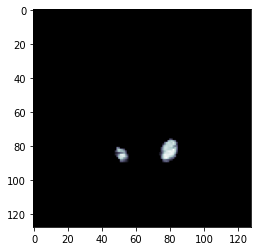

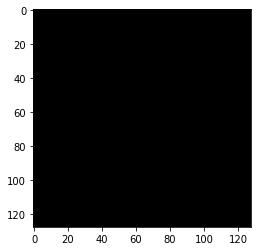

2
torch.Size([4, 128, 128, 128])


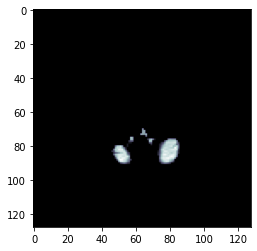

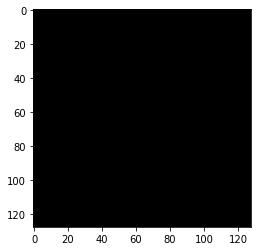

3
torch.Size([4, 128, 128, 128])


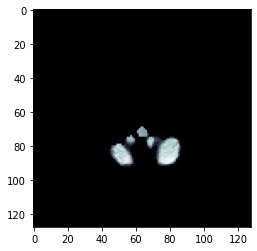

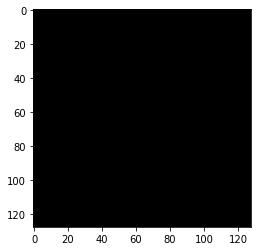

4
torch.Size([4, 128, 128, 128])


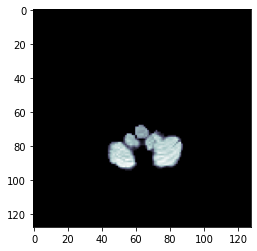

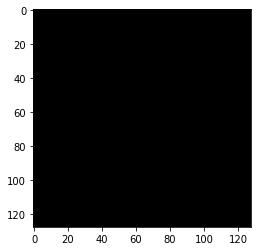

5
torch.Size([4, 128, 128, 128])


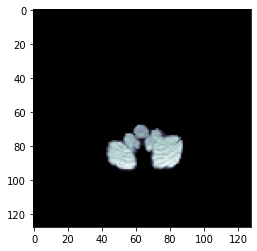

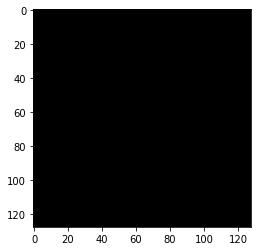

6
torch.Size([4, 128, 128, 128])


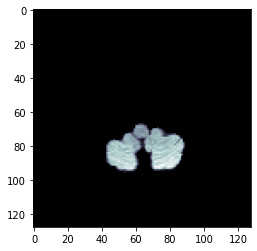

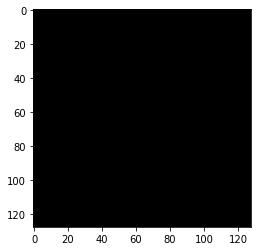

7
torch.Size([4, 128, 128, 128])


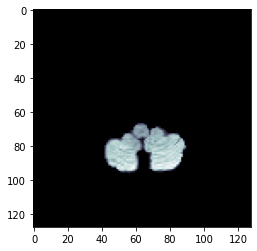

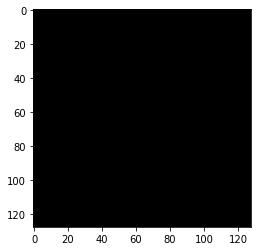

8
torch.Size([4, 128, 128, 128])


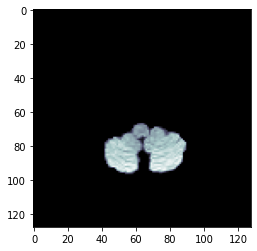

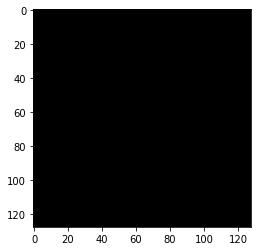

9
torch.Size([4, 128, 128, 128])


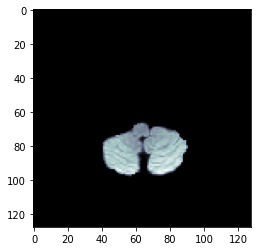

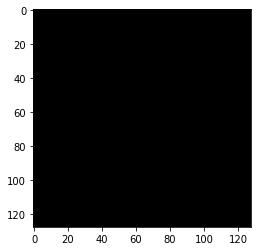

10
torch.Size([4, 128, 128, 128])


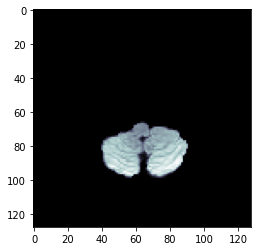

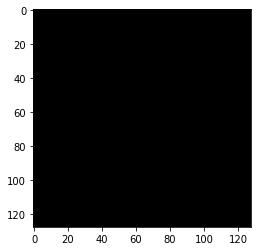

11
torch.Size([4, 128, 128, 128])


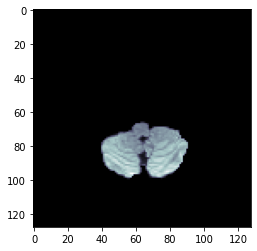

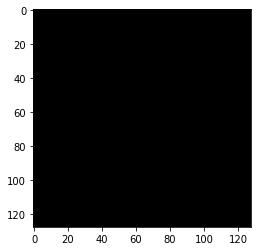

12
torch.Size([4, 128, 128, 128])


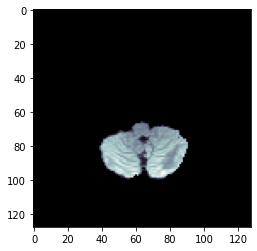

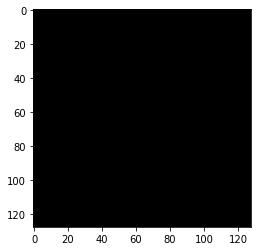

13
torch.Size([4, 128, 128, 128])


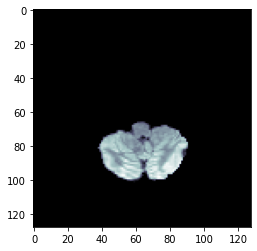

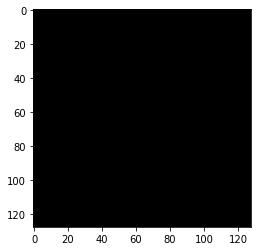

14
torch.Size([4, 128, 128, 128])


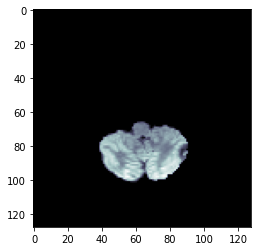

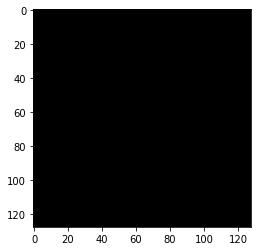

15
torch.Size([4, 128, 128, 128])


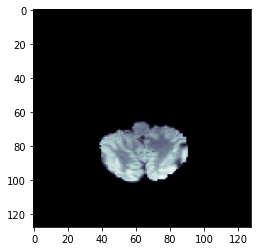

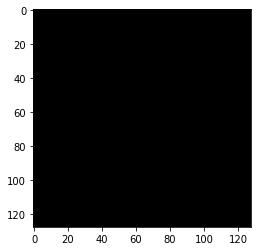

16
torch.Size([4, 128, 128, 128])


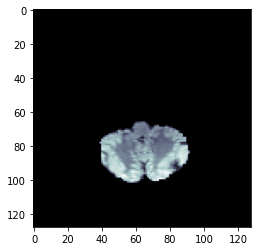

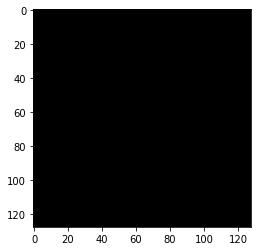

17
torch.Size([4, 128, 128, 128])


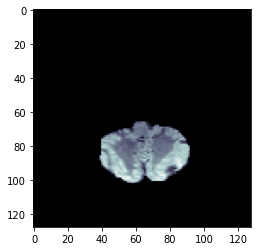

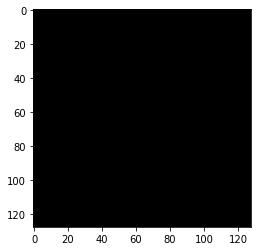

18
torch.Size([4, 128, 128, 128])


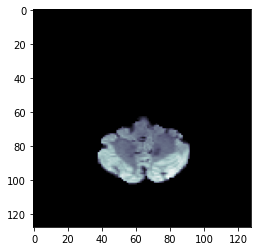

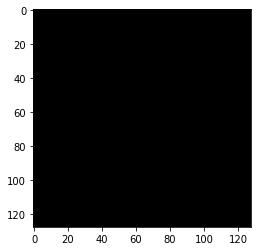

19
torch.Size([4, 128, 128, 128])


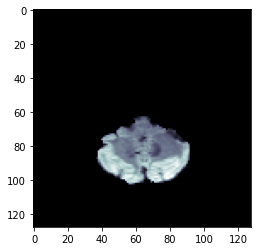

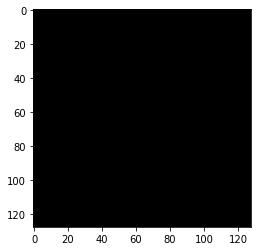

20
torch.Size([4, 128, 128, 128])


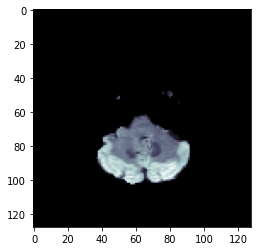

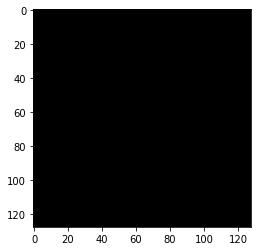

21
torch.Size([4, 128, 128, 128])


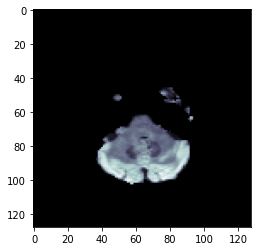

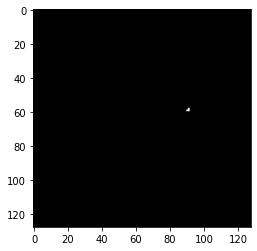

22
torch.Size([4, 128, 128, 128])


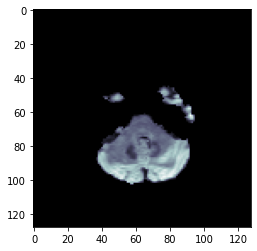

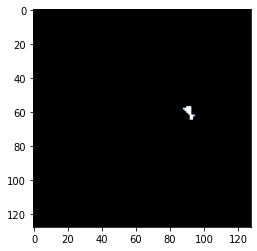

23
torch.Size([4, 128, 128, 128])


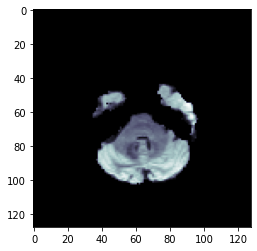

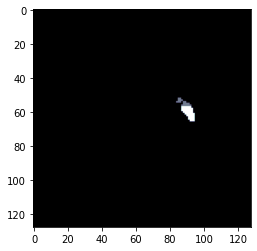

24
torch.Size([4, 128, 128, 128])


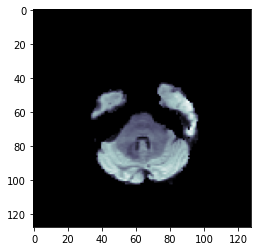

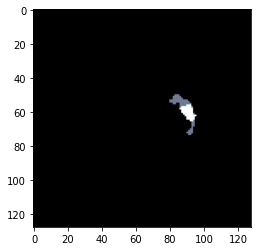

25
torch.Size([4, 128, 128, 128])


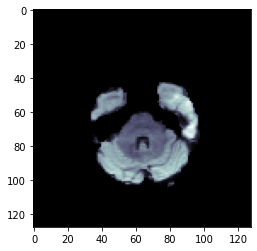

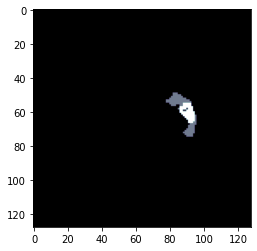

26
torch.Size([4, 128, 128, 128])


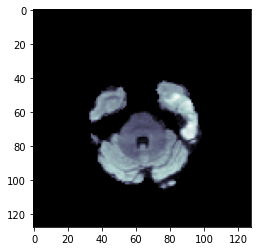

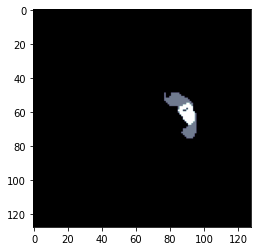

27
torch.Size([4, 128, 128, 128])


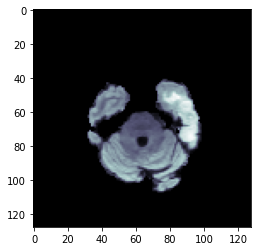

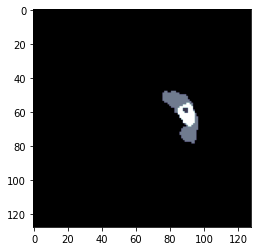

28
torch.Size([4, 128, 128, 128])


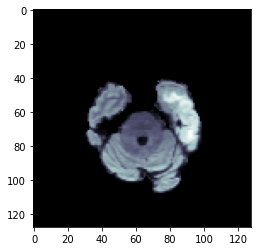

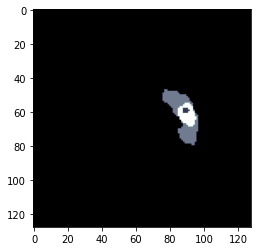

29
torch.Size([4, 128, 128, 128])


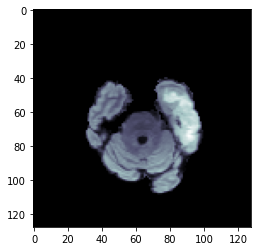

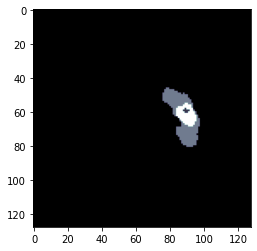

30
torch.Size([4, 128, 128, 128])


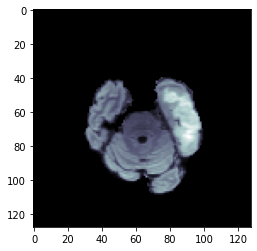

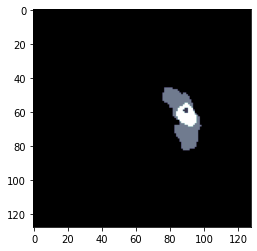

31
torch.Size([4, 128, 128, 128])


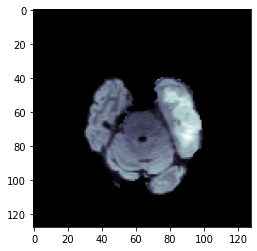

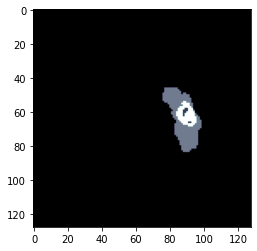

32
torch.Size([4, 128, 128, 128])


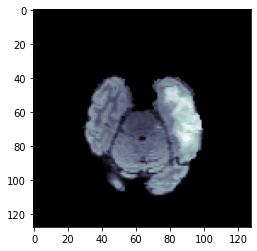

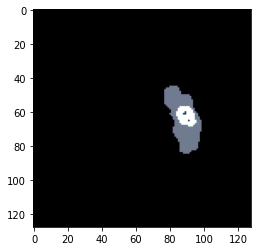

33
torch.Size([4, 128, 128, 128])


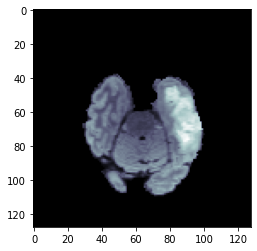

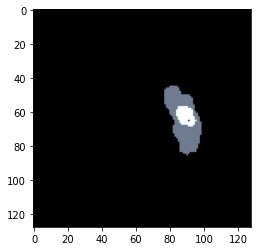

34
torch.Size([4, 128, 128, 128])


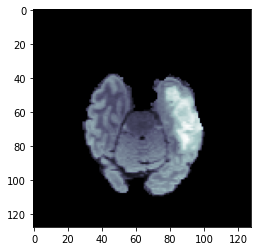

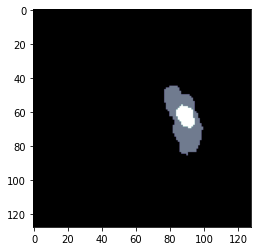

35
torch.Size([4, 128, 128, 128])


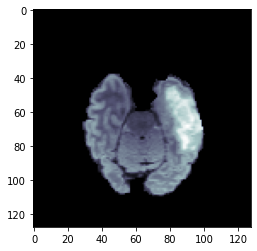

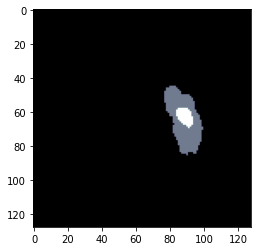

36
torch.Size([4, 128, 128, 128])


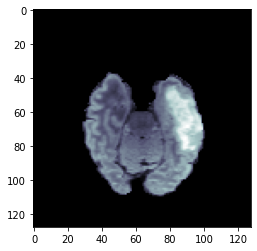

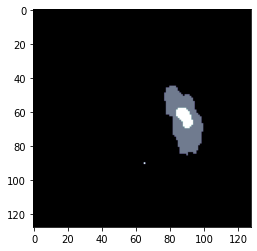

37
torch.Size([4, 128, 128, 128])


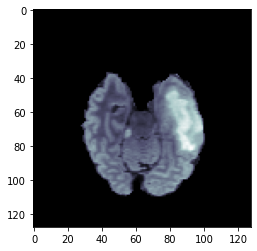

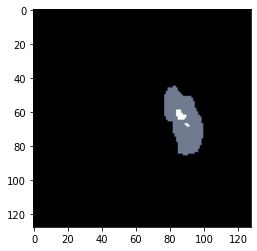

38
torch.Size([4, 128, 128, 128])


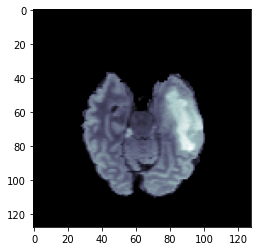

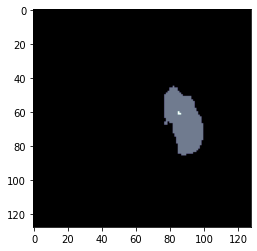

39
torch.Size([4, 128, 128, 128])


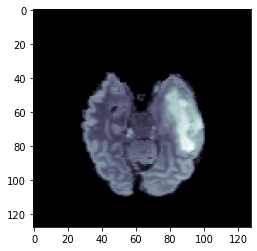

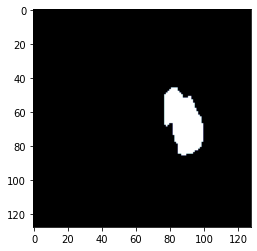

40
torch.Size([4, 128, 128, 128])


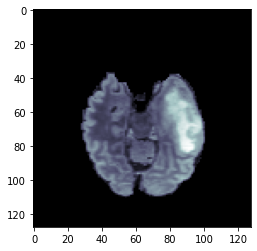

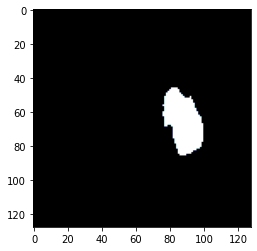

41
torch.Size([4, 128, 128, 128])


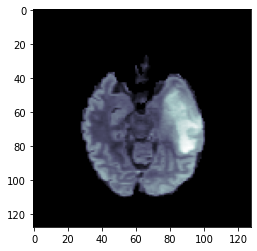

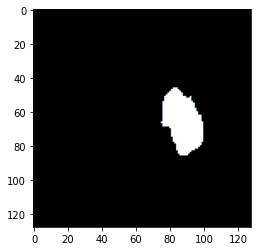

42
torch.Size([4, 128, 128, 128])


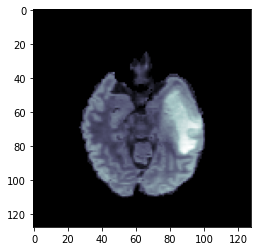

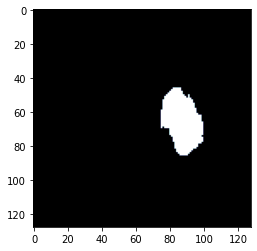

43
torch.Size([4, 128, 128, 128])


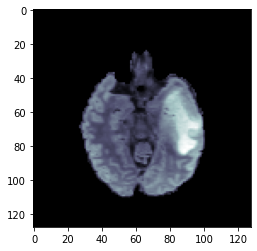

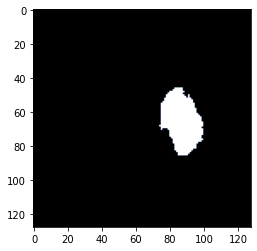

44
torch.Size([4, 128, 128, 128])


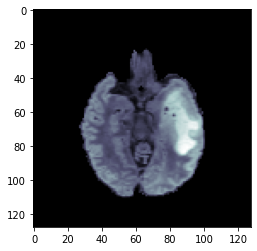

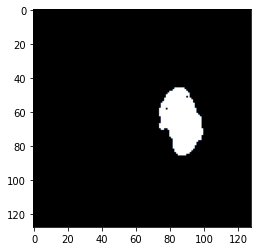

45
torch.Size([4, 128, 128, 128])


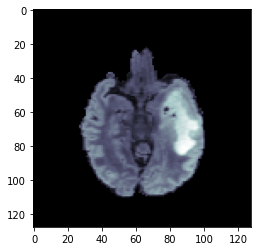

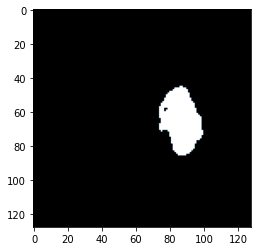

46
torch.Size([4, 128, 128, 128])


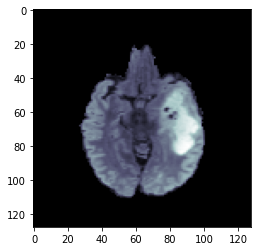

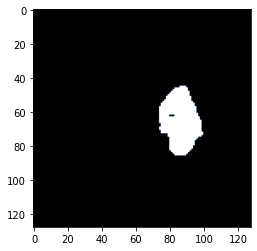

47
torch.Size([4, 128, 128, 128])


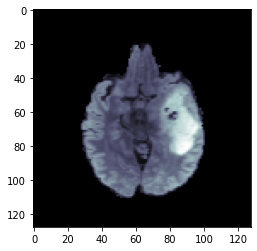

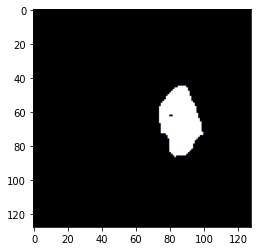

48
torch.Size([4, 128, 128, 128])


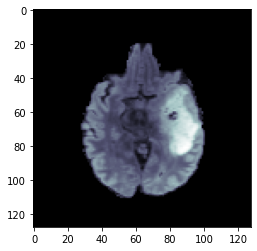

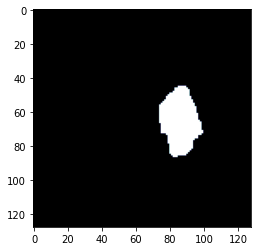

49
torch.Size([4, 128, 128, 128])


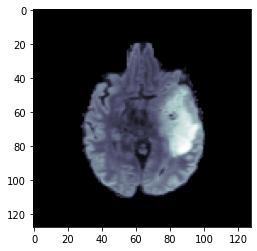

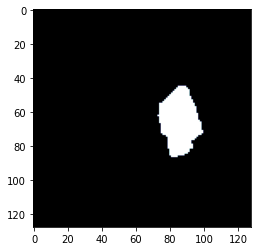

50
torch.Size([4, 128, 128, 128])


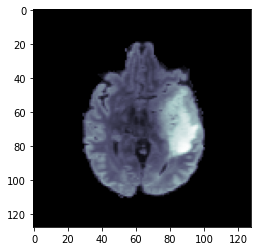

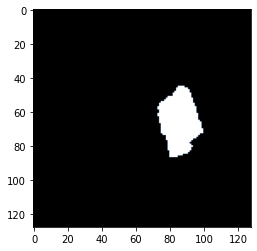

51
torch.Size([4, 128, 128, 128])


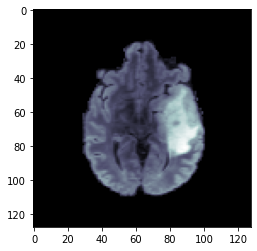

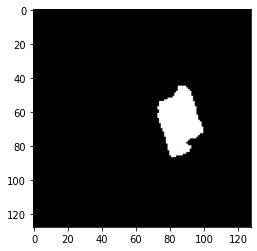

52
torch.Size([4, 128, 128, 128])


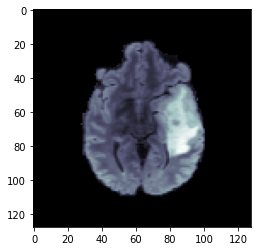

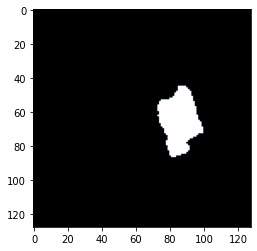

53
torch.Size([4, 128, 128, 128])


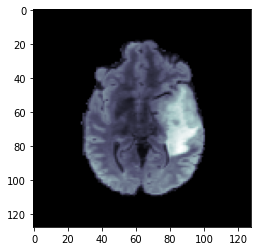

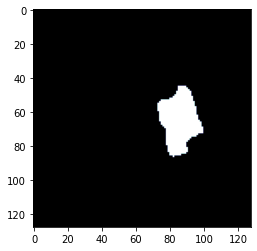

54
torch.Size([4, 128, 128, 128])


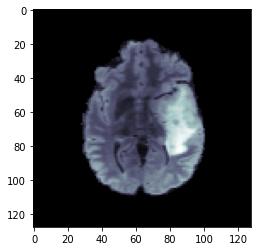

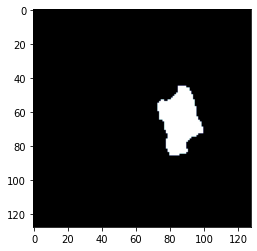

55
torch.Size([4, 128, 128, 128])


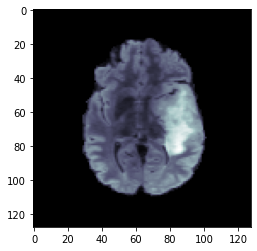

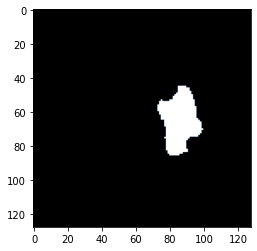

56
torch.Size([4, 128, 128, 128])


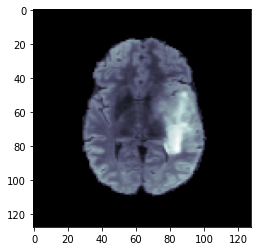

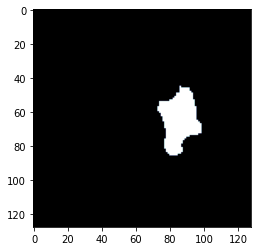

57
torch.Size([4, 128, 128, 128])


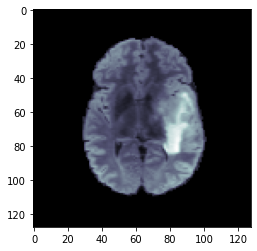

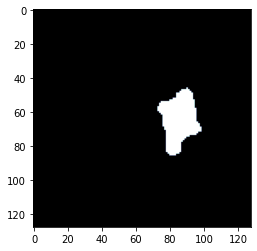

58
torch.Size([4, 128, 128, 128])


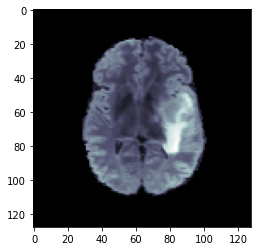

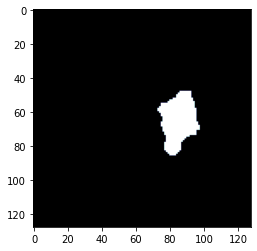

59
torch.Size([4, 128, 128, 128])


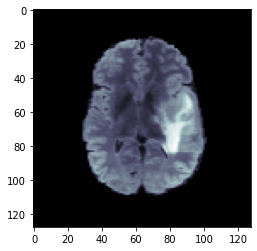

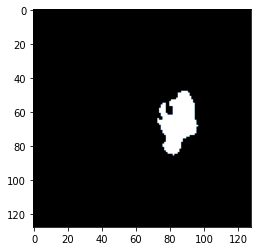

60
torch.Size([4, 128, 128, 128])


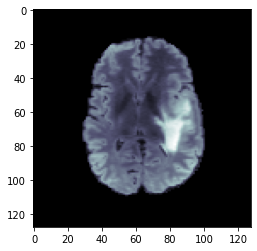

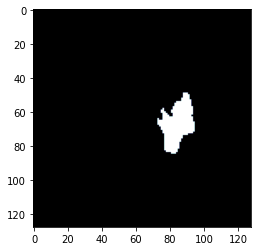

61
torch.Size([4, 128, 128, 128])


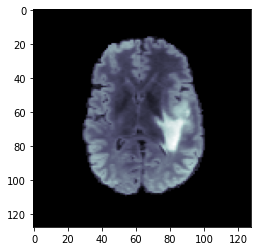

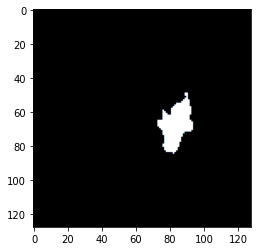

62
torch.Size([4, 128, 128, 128])


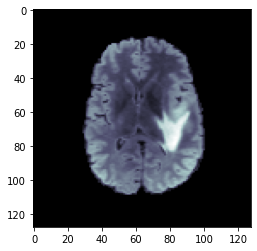

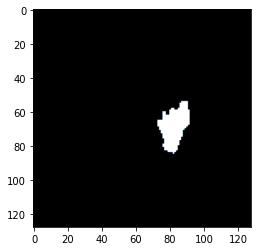

63
torch.Size([4, 128, 128, 128])


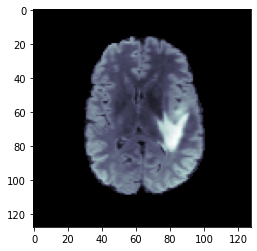

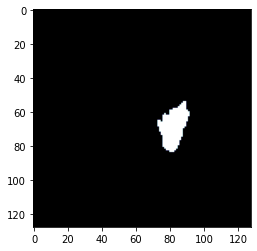

64
torch.Size([4, 128, 128, 128])


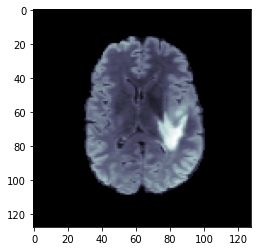

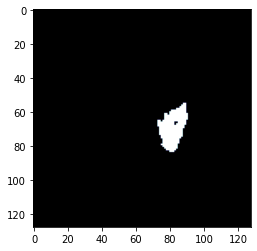

65
torch.Size([4, 128, 128, 128])


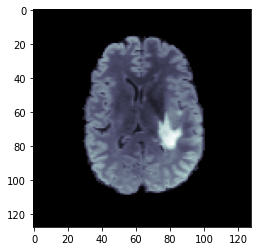

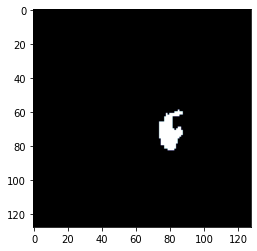

66
torch.Size([4, 128, 128, 128])


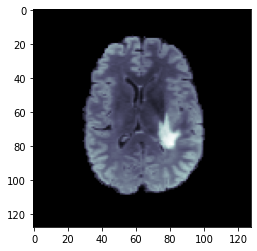

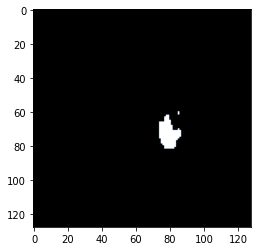

67
torch.Size([4, 128, 128, 128])


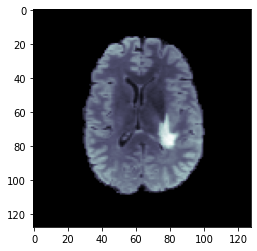

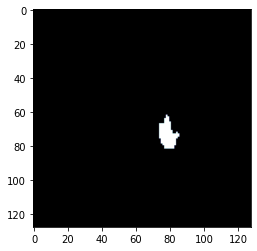

68
torch.Size([4, 128, 128, 128])


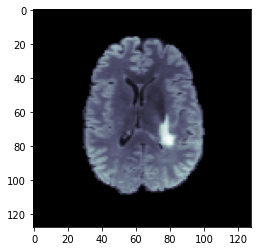

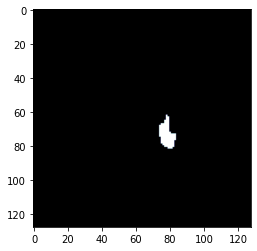

69
torch.Size([4, 128, 128, 128])


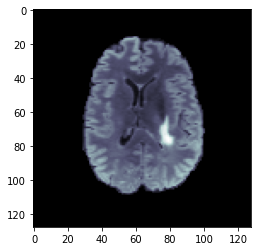

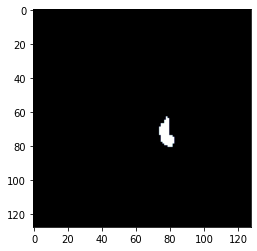

70
torch.Size([4, 128, 128, 128])


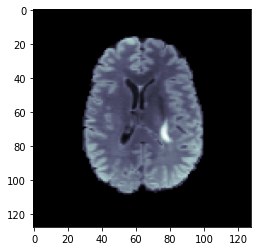

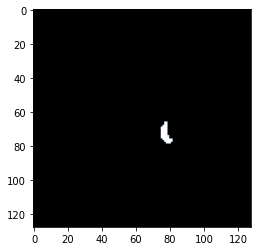

71
torch.Size([4, 128, 128, 128])


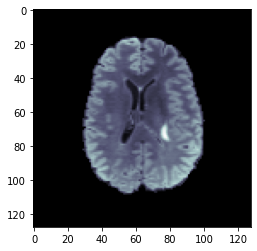

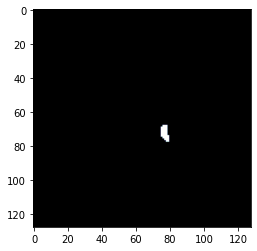

72
torch.Size([4, 128, 128, 128])


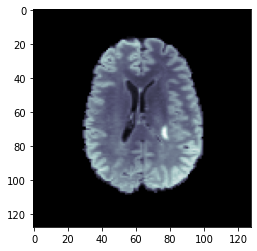

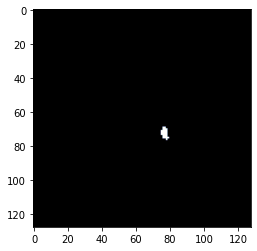

73
torch.Size([4, 128, 128, 128])


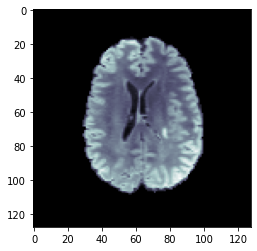

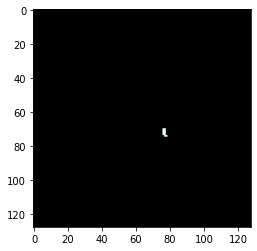

74
torch.Size([4, 128, 128, 128])


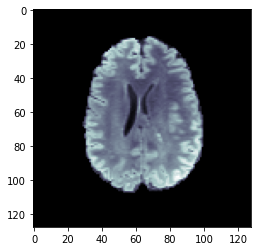

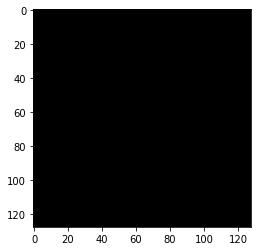

75
torch.Size([4, 128, 128, 128])


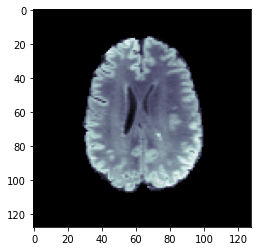

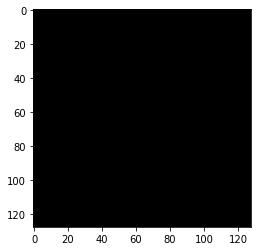

76
torch.Size([4, 128, 128, 128])


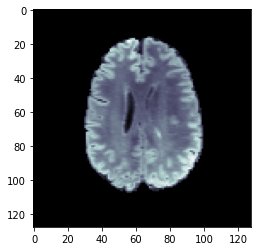

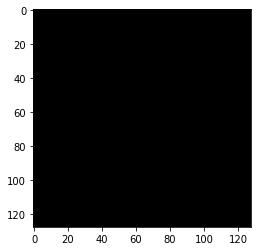

77
torch.Size([4, 128, 128, 128])


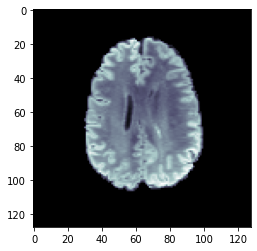

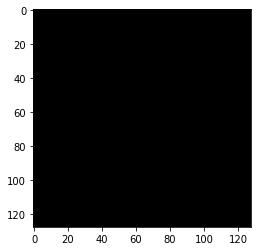

78
torch.Size([4, 128, 128, 128])


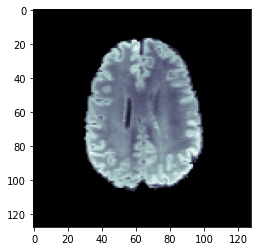

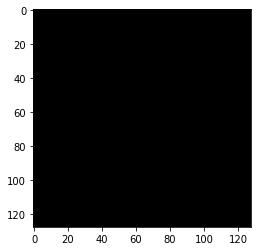

79
torch.Size([4, 128, 128, 128])


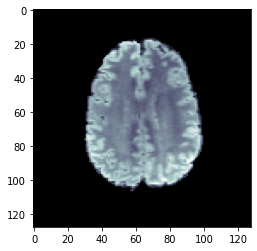

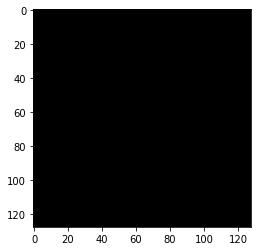

80
torch.Size([4, 128, 128, 128])


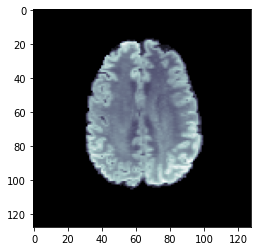

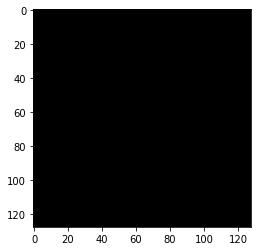

81
torch.Size([4, 128, 128, 128])


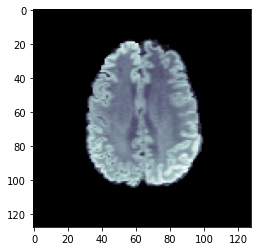

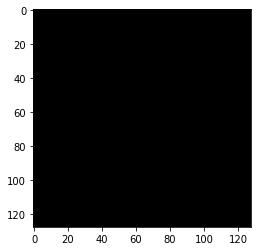

82
torch.Size([4, 128, 128, 128])


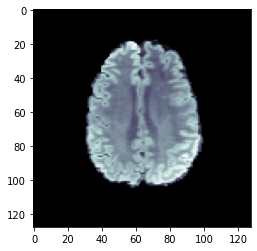

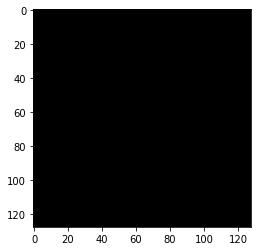

83
torch.Size([4, 128, 128, 128])


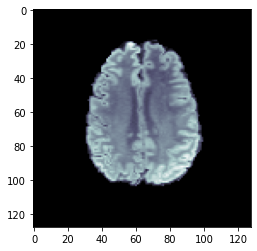

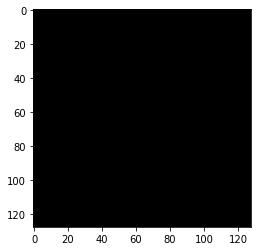

84
torch.Size([4, 128, 128, 128])


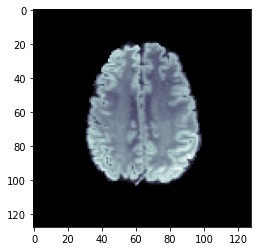

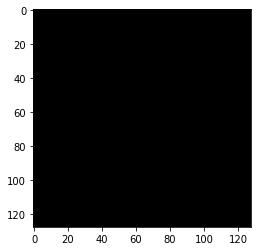

85
torch.Size([4, 128, 128, 128])


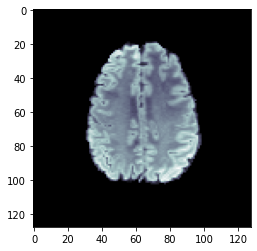

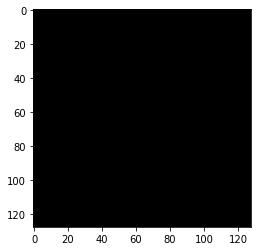

86
torch.Size([4, 128, 128, 128])


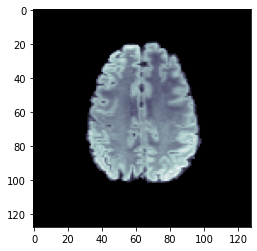

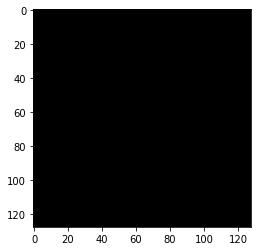

87
torch.Size([4, 128, 128, 128])


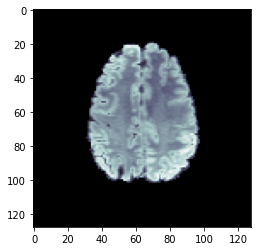

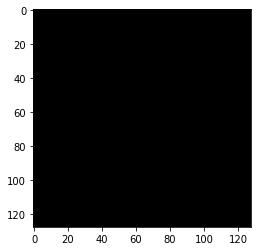

88
torch.Size([4, 128, 128, 128])


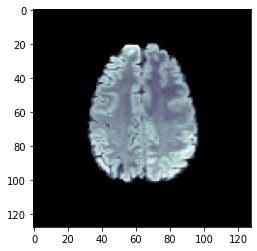

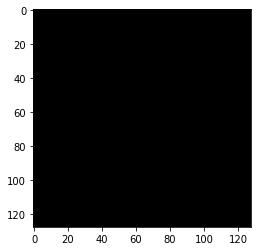

89
torch.Size([4, 128, 128, 128])


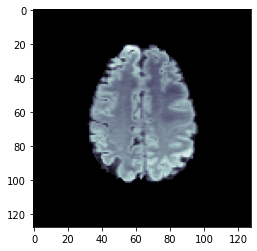

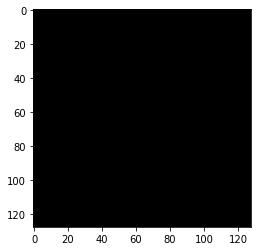

90
torch.Size([4, 128, 128, 128])


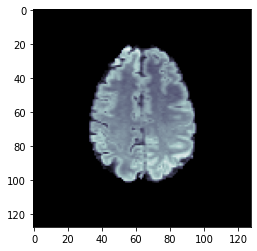

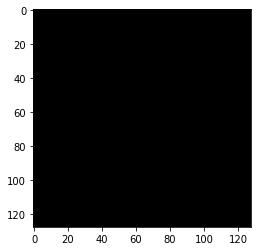

91
torch.Size([4, 128, 128, 128])


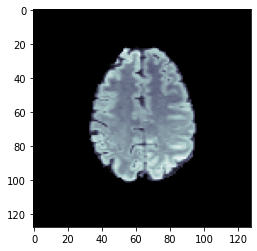

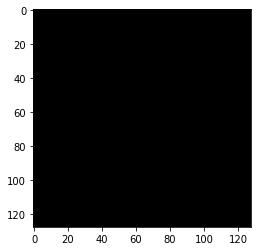

92
torch.Size([4, 128, 128, 128])


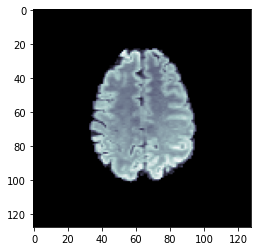

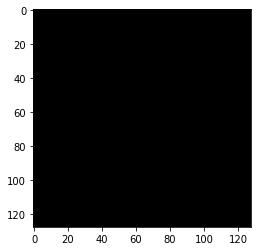

93
torch.Size([4, 128, 128, 128])


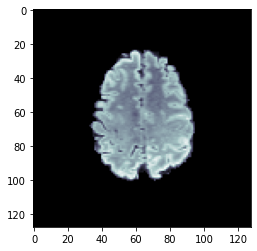

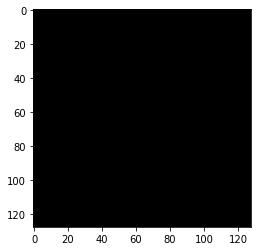

94
torch.Size([4, 128, 128, 128])


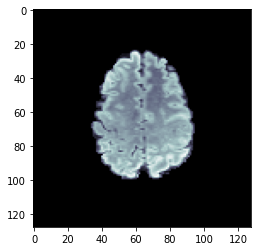

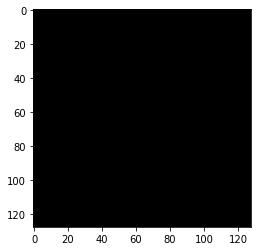

95
torch.Size([4, 128, 128, 128])


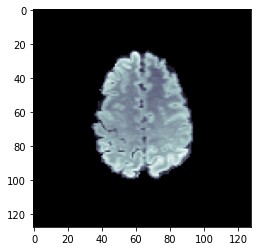

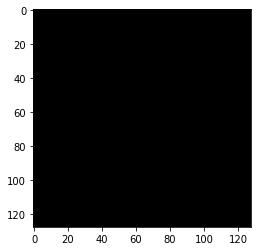

96
torch.Size([4, 128, 128, 128])


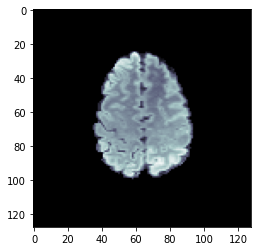

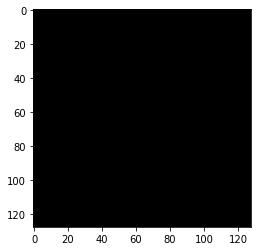

97
torch.Size([4, 128, 128, 128])


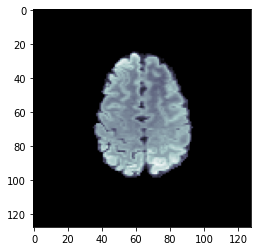

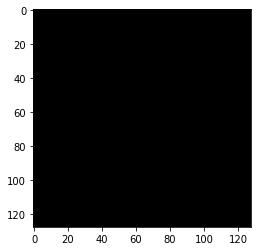

98
torch.Size([4, 128, 128, 128])


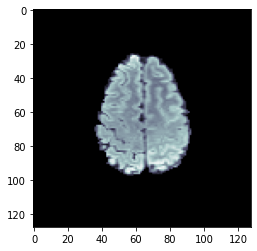

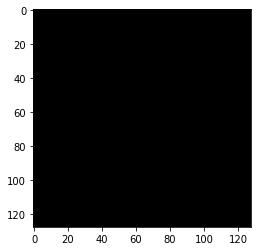

99
torch.Size([4, 128, 128, 128])


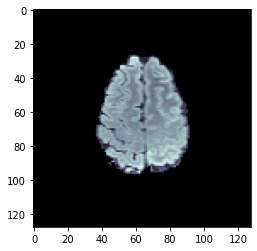

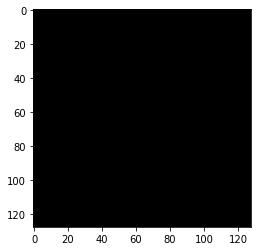

100
torch.Size([4, 128, 128, 128])


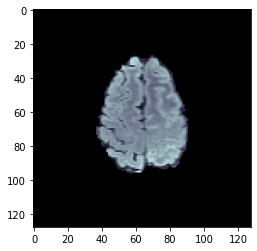

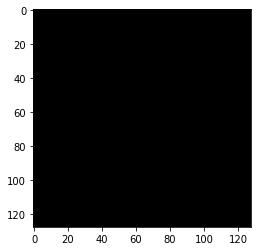

101
torch.Size([4, 128, 128, 128])


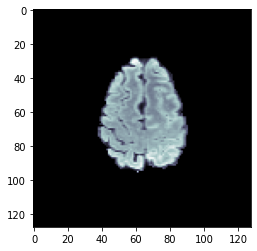

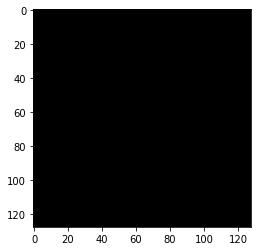

102
torch.Size([4, 128, 128, 128])


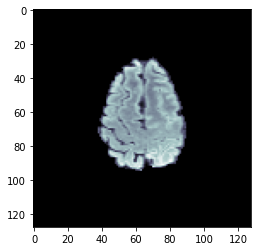

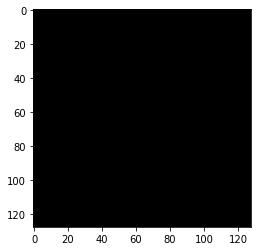

103
torch.Size([4, 128, 128, 128])


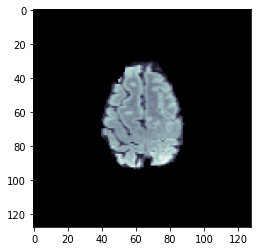

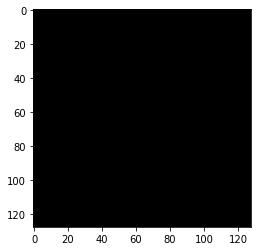

104
torch.Size([4, 128, 128, 128])


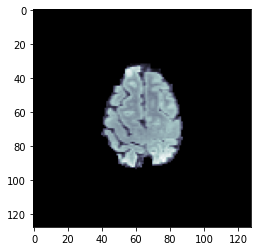

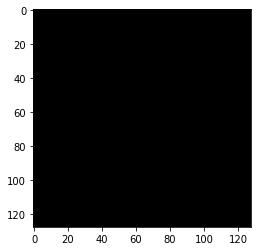

105
torch.Size([4, 128, 128, 128])


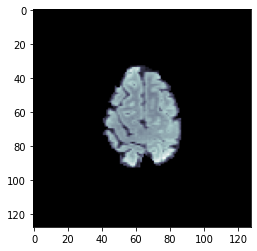

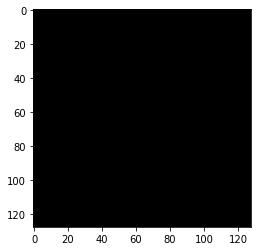

106
torch.Size([4, 128, 128, 128])


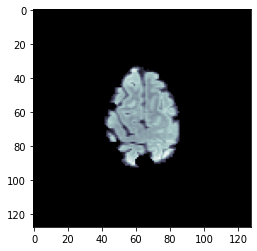

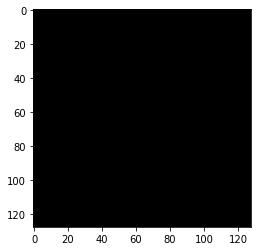

107
torch.Size([4, 128, 128, 128])


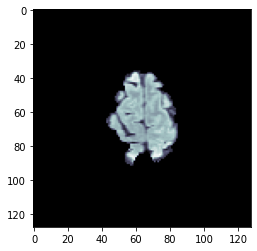

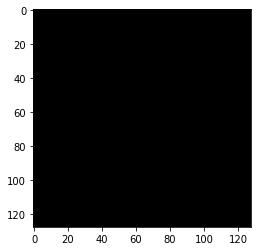

108
torch.Size([4, 128, 128, 128])


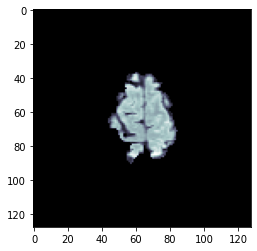

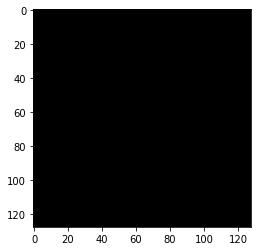

109
torch.Size([4, 128, 128, 128])


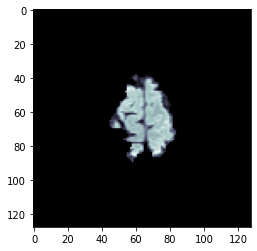

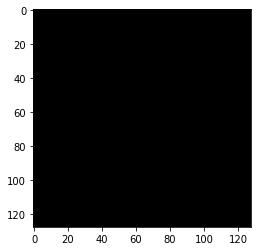

110
torch.Size([4, 128, 128, 128])


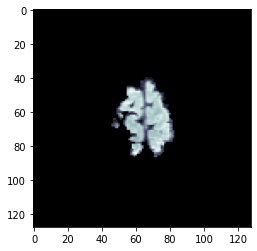

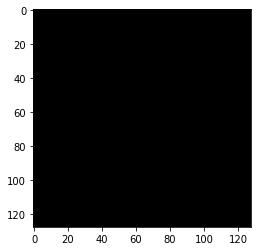

111
torch.Size([4, 128, 128, 128])


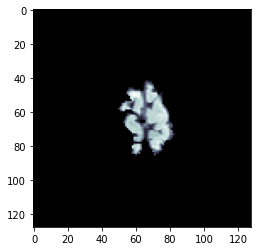

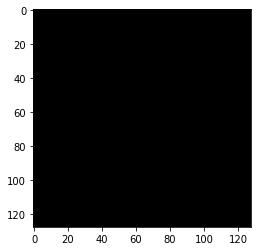

112
torch.Size([4, 128, 128, 128])


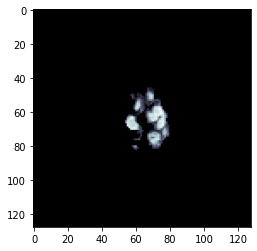

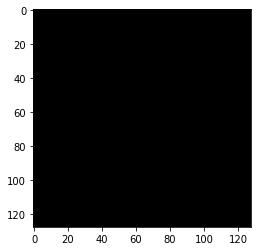

113
torch.Size([4, 128, 128, 128])


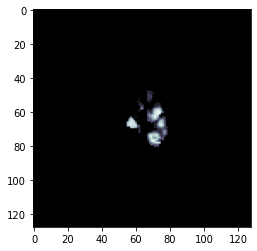

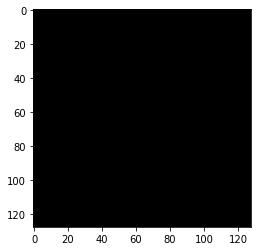

114
torch.Size([4, 128, 128, 128])


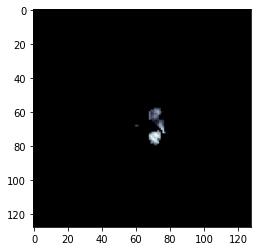

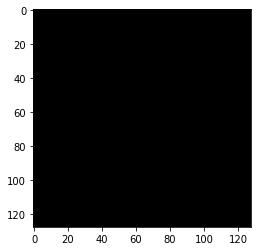

115
torch.Size([4, 128, 128, 128])


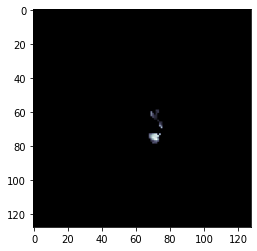

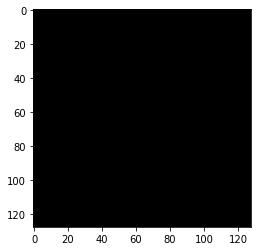

116
torch.Size([4, 128, 128, 128])


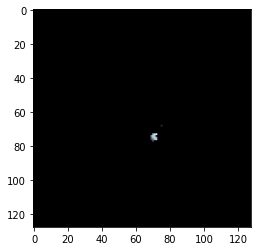

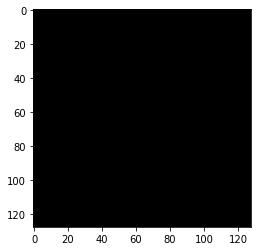

117
torch.Size([4, 128, 128, 128])


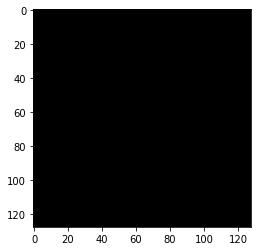

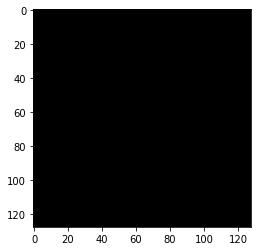

118
torch.Size([4, 128, 128, 128])


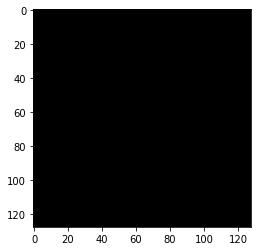

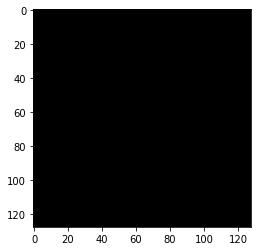

119
torch.Size([4, 128, 128, 128])


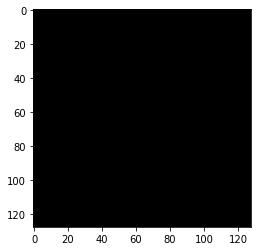

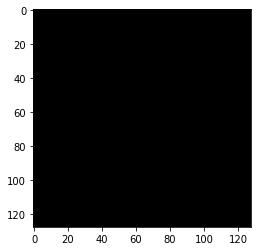

120
torch.Size([4, 128, 128, 128])


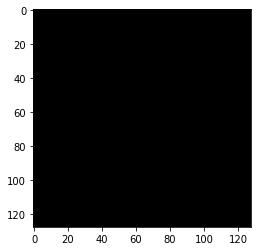

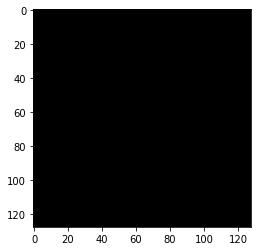

121
torch.Size([4, 128, 128, 128])


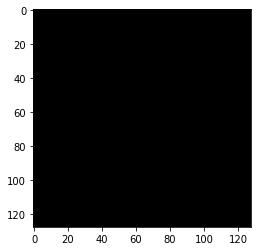

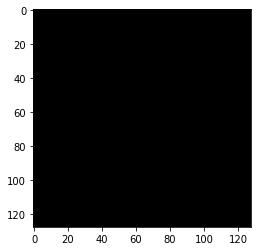

122
torch.Size([4, 128, 128, 128])


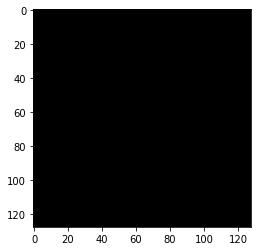

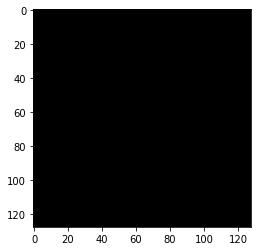

123
torch.Size([4, 128, 128, 128])


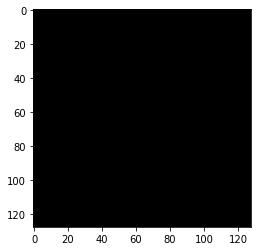

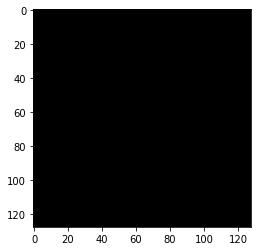

124
torch.Size([4, 128, 128, 128])


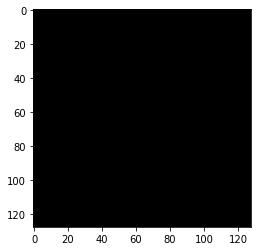

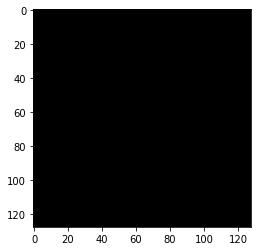

125
torch.Size([4, 128, 128, 128])


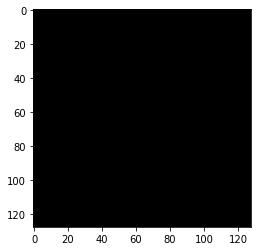

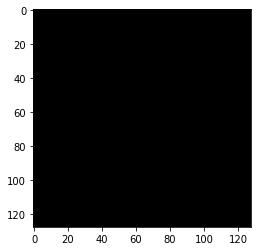

126
torch.Size([4, 128, 128, 128])


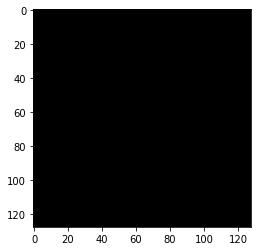

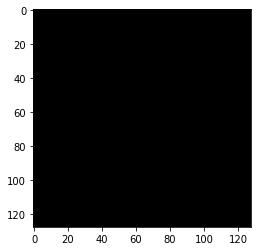

127
torch.Size([4, 128, 128, 128])


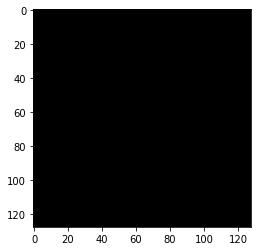

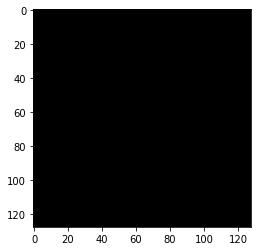

128
torch.Size([4, 128, 128, 128])


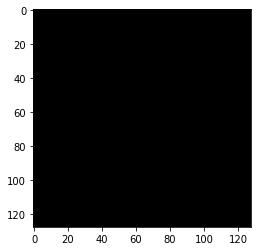

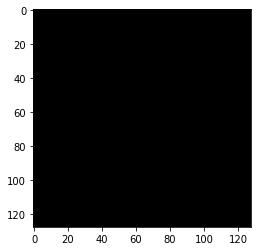

In [207]:
teimage, teseg = next(iter(testloader)) # every time you run this, it gives you new image and new label (since it also shuffles)

teimage = teimage.squeeze()
teseg = teseg.squeeze()

print(teimage.shape)
print(teseg.shape)


for i in range(teimage.shape[2]):
  print(i+1)
  print(teimage.shape)
  brain_slice = teimage[0][i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  brain_slice_sg = teseg[i, :, :] # 3nd channel
  plt.imshow(brain_slice, cmap="bone")
  plt.show()
  plt.close()
  plt.imshow(brain_slice_sg, cmap="bone")
  plt.show()
  plt.close()

In [210]:
# use after for text and such: https://towardsdatascience.com/cheat-sheet-for-google-colab-63853778c093

In [211]:
"""
Model Implementations

Model #1: Fully Convolutional Network (FCN)
https://github.com/shizacharania/IAMLAB-BraTS-Challenge/blob/main/FCN.ipynb 

Model #2: nnU-Net
https://github.com/shizacharania/IAMLAB-BraTS-Challenge/blob/main/nnUnet.ipynb

Model #3: Residual 3D U-Net
https://github.com/shizacharania/IAMLAB-BraTS-Challenge/blob/main/Residual_3D_U_Net.ipynb

Model #4: HDC-Net
https://github.com/shizacharania/IAMLAB-BraTS-Challenge/blob/main/HDC_Net.ipynb

Model #5: SA-Net
https://github.com/shizacharania/IAMLAB-BraTS-Challenge/blob/main/sa_net.ipynb 
"""

'\nModel Implementations\n\nModel #1: Fully Convolutional Network (FCN)\nhttps://github.com/shizacharania/IAMLAB-BraTS-Challenge/blob/main/FCN.ipynb \n\nModel #2: nnU-Net\nhttps://github.com/shizacharania/IAMLAB-BraTS-Challenge/blob/main/nnUnet.ipynb\n\nModel #3: Residual 3D U-Net\nhttps://github.com/shizacharania/IAMLAB-BraTS-Challenge/blob/main/Residual_3D_U_Net.ipynb\n\nModel #4: HDC-Net\nhttps://github.com/shizacharania/IAMLAB-BraTS-Challenge/blob/main/HDC_Net.ipynb\n\nModel #5: SA-Net\nhttps://github.com/shizacharania/IAMLAB-BraTS-Challenge/blob/main/sa_net.ipynb \n'